In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
# Plot style
plt.style.use("seaborn-v0_8")

In [2]:
# Load processed data
df = pd.read_csv("../data/processed/processed_data.csv")

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Inspect data
df.head()

date coin    open    high     low   close       volume
0 2025-01-23 05:30:00  ADA  0.9827  1.0118  0.9512  0.9867  192569354.5
1 2025-01-24 05:30:00  ADA  0.9867  1.0100  0.9636  0.9712  124426928.3
2 2025-01-25 05:30:00  ADA  0.9712  0.9919  0.9642  0.9766   56721656.8
3 2025-01-26 05:30:00  ADA  0.9766  1.0003  0.9515  0.9530   73197919.3
4 2025-01-27 05:30:00  ADA  0.9530  0.9587  0.8568  0.9345  257950415.8

In [ ]:
## Volatility Analysis

In [3]:
print("Coins:", df["coin"].unique())
print("Date range:", df["date"].min(), "→", df["date"].max())
print("Total rows:", len(df))

Coins: ['ADA' 'BNB' 'BTC' 'DOGE' 'DOT' 'ETH' 'LTC' 'SOL' 'TRX' 'XRP']
Date range: 2025-01-23 05:30:00 → 2026-01-22 05:30:00
Total rows: 3650


In [7]:
df["daily_return"] = df.groupby("coin")["close"].pct_change()

df[["date", "coin", "close", "daily_return"]].head(10)

date coin   close  daily_return
0 2025-01-23 05:30:00  ADA  0.9867           NaN
1 2025-01-24 05:30:00  ADA  0.9712     -0.015709
2 2025-01-25 05:30:00  ADA  0.9766      0.005560
3 2025-01-26 05:30:00  ADA  0.9530     -0.024165
4 2025-01-27 05:30:00  ADA  0.9345     -0.019412
5 2025-01-28 05:30:00  ADA  0.9169     -0.018834
6 2025-01-29 05:30:00  ADA  0.9399      0.025085
7 2025-01-30 05:30:00  ADA  0.9595      0.020853
8 2025-01-31 05:30:00  ADA  0.9429     -0.017301
9 2025-02-01 05:30:00  ADA  0.8948     -0.051013

In [8]:
windows = [7, 14, 30]

for w in windows:
    df[f"volatility_{w}d"] = (
        df.groupby("coin")["daily_return"]
          .rolling(window=w)
          .std()
          .reset_index(level=0, drop=True)
    )

df.head(50)

coin                date    open    high     low   close        volume  \
0   ADA 2025-01-23 05:30:00  0.9827  1.0118  0.9512  0.9867  1.925694e+08   
1   ADA 2025-01-24 05:30:00  0.9867  1.0100  0.9636  0.9712  1.244269e+08   
2   ADA 2025-01-25 05:30:00  0.9712  0.9919  0.9642  0.9766  5.672166e+07   
3   ADA 2025-01-26 05:30:00  0.9766  1.0003  0.9515  0.9530  7.319792e+07   
4   ADA 2025-01-27 05:30:00  0.9530  0.9587  0.8568  0.9345  2.579504e+08   
5   ADA 2025-01-28 05:30:00  0.9346  0.9684  0.9031  0.9169  1.247072e+08   
6   ADA 2025-01-29 05:30:00  0.9168  0.9603  0.9018  0.9399  1.351423e+08   
7   ADA 2025-01-30 05:30:00  0.9398  0.9886  0.9363  0.9595  8.672114e+07   
8   ADA 2025-01-31 05:30:00  0.9595  0.9837  0.9347  0.9429  1.138188e+08   
9   ADA 2025-02-01 05:30:00  0.9428  0.9576  0.8875  0.8948  8.838479e+07   
10  ADA 2025-02-02 05:30:00  0.8947  0.9113  0.7513  0.8052  3.405237e+08   
11  ADA 2025-02-03 05:30:00  0.8051  0.8245  0.5060  0.8120  1.336951e+09   
12  ADA 2025-02-04 05:30:00  0.8121  0.8198  0.7150  0.7439  3.362027e+08   
13  ADA 2025-02-05 05:30:00  0.7440  0.7764  0.7251  0.7325  1.747179e+08   
14  ADA 2025-02-06 05:30:00  0.7325  0.7660  0.6978  0.7052  1.875786e+08   
15  ADA 2025-02-07 05:30:00  0.7052  0.7532  0.6902  0.7072  2.061902e+08   
16  ADA 2025-02-08 05:30:00  0.7072  0.7180  0.6815  0.7005  1.064400e+08   
17  ADA 2025-02-09 05:30:00  0.7006  0.7160  0.6503  0.6814  1.459726e+08   
18  ADA 2025-02-10 05:30:00  0.6815  0.7245  0.6632  0.7121  1.687819e+08   
19  ADA 2025-02-11 05:30:00  0.7121  0.8213  0.7101  0.7781  3.640295e+08   
20  ADA 2025-02-12 05:30:00  0.7782  0.8079  0.7448  0.7997  2.713350e+08   
21  ADA 2025-02-13 05:30:00  0.7998  0.8309  0.7693  0.8107  1.484087e+08   
22  ADA 2025-02-14 05:30:00  0.8107  0.8293  0.7891  0.7998  1.448803e+08   
23  ADA 2025-02-15 05:30:00  0.7997  0.8141  0.7745  0.7811  7.264944e+07   
24  ADA 2025-02-16 05:30:00  0.7811  0.7893  0.7615  0.7714  6.265137e+07   
25  ADA 2025-02-17 05:30:00  0.7714  0.8291  0.7705  0.8089  1.936810e+08   
26  ADA 2025-02-18 05:30:00  0.8089  0.8140  0.7351  0.7541  1.730688e+08   
27  ADA 2025-02-19 05:30:00  0.7542  0.7761  0.7328  0.7738  1.185602e+08   
28  ADA 2025-02-20 05:30:00  0.7737  0.8111  0.7703  0.8036  1.230136e+08   
29  ADA 2025-02-21 05:30:00  0.8036  0.8187  0.7501  0.7621  1.761295e+08   
30  ADA 2025-02-22 05:30:00  0.7622  0.7845  0.7571  0.7734  7.004882e+07   
31  ADA 2025-02-23 05:30:00  0.7733  0.7883  0.7596  0.7697  6.806647e+07   
32  ADA 2025-02-24 05:30:00  0.7698  0.7774  0.6700  0.6816  1.878528e+08   
33  ADA 2025-02-25 05:30:00  0.6816  0.6950  0.6302  0.6832  3.146199e+08   
34  ADA 2025-02-26 05:30:00  0.6832  0.6954  0.6312  0.6474  1.886831e+08   
35  ADA 2025-02-27 05:30:00  0.6475  0.6798  0.6263  0.6451  1.193381e+08   
36  ADA 2025-02-28 05:30:00  0.6451  0.6466  0.5801  0.6328  2.581104e+08   
37  ADA 2025-03-01 05:30:00  0.6328  0.6770  0.6252  0.6593  1.018453e+08   
38  ADA 2025-03-02 05:30:00  0.6593  1.1488  0.6450  1.1350  1.462027e+09   
39  ADA 2025-03-03 05:30:00  1.1349  1.1747  0.8228  0.8578  1.410346e+09   
40  ADA 2025-03-04 05:30:00  0.8577  0.9562  0.7576  0.9409  1.103034e+09   
41  ADA 2025-03-05 05:30:00  0.9409  1.0278  0.9136  0.9741  6.845429e+08   
42  ADA 2025-03-06 05:30:00  0.9741  0.9886  0.8854  0.9065  4.267091e+08   
43  ADA 2025-03-07 05:30:00  0.9065  0.9206  0.8064  0.8181  7.897920e+08   
44  ADA 2025-03-08 05:30:00  0.8180  0.8392  0.7931  0.8052  1.957639e+08   
45  ADA 2025-03-09 05:30:00  0.8052  0.8176  0.7090  0.7215  3.415844e+08   
46  ADA 2025-03-10 05:30:00  0.7216  0.7786  0.6582  0.6712  4.521305e+08   
47  ADA 2025-03-11 05:30:00  0.6711  0.7444  0.6471  0.7241  4.183685e+08   
48  ADA 2025-03-12 05:30:00  0.7240  0.7700  0.7111  0.7360  2.724070e+08   
49  ADA 2025-03-13 05:30:00  0.7360  0.7420  0.6909  0.7030  2.648834e+08   

    daily_return  volatility_7d  volatility_14d  volatility_30d  
0        

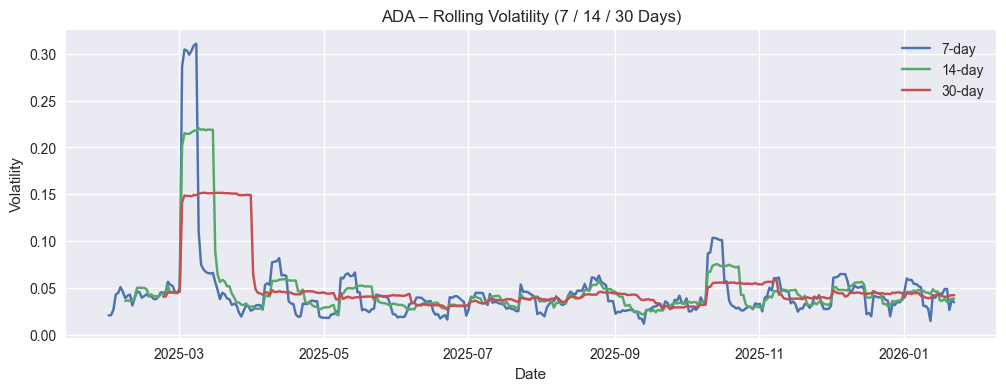

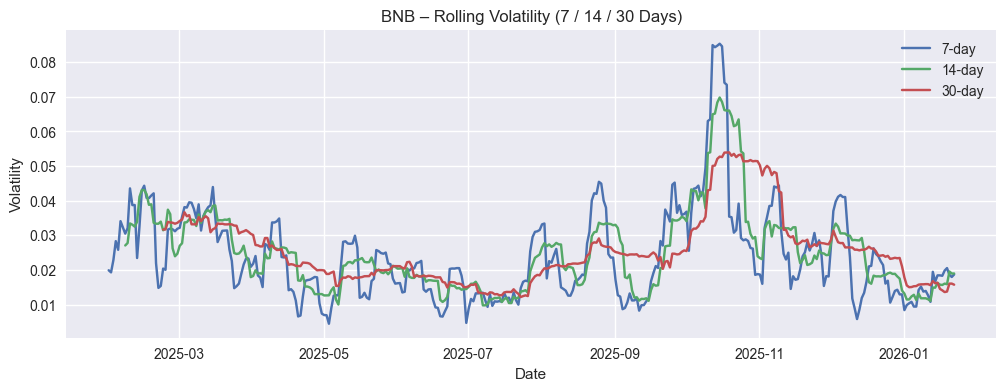

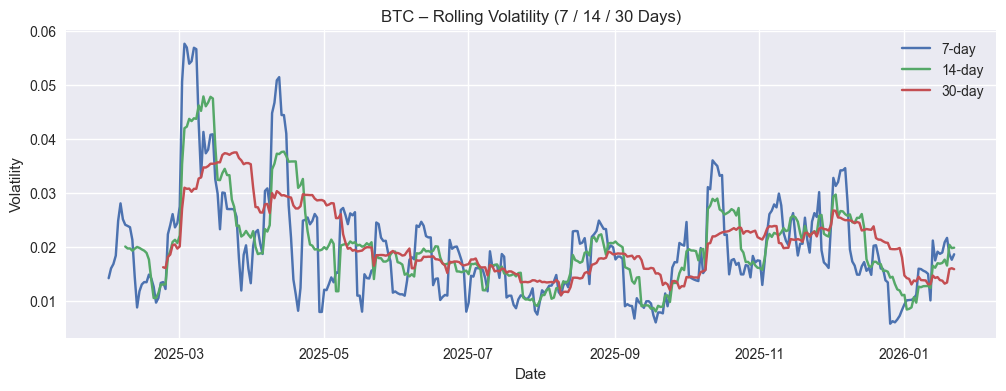

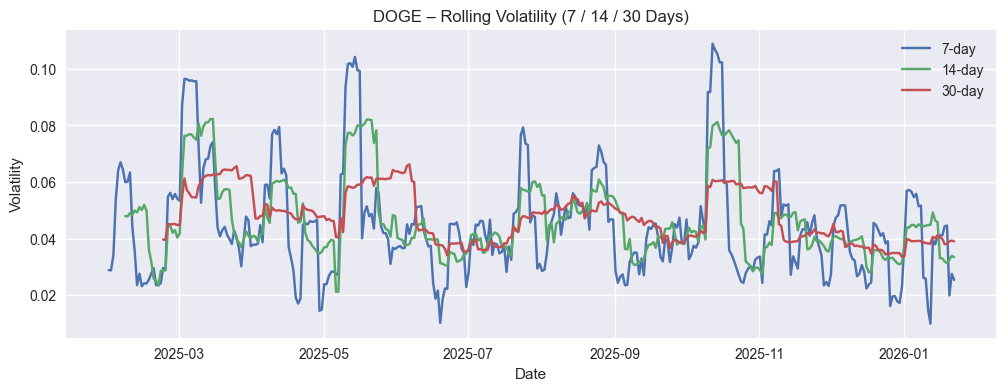

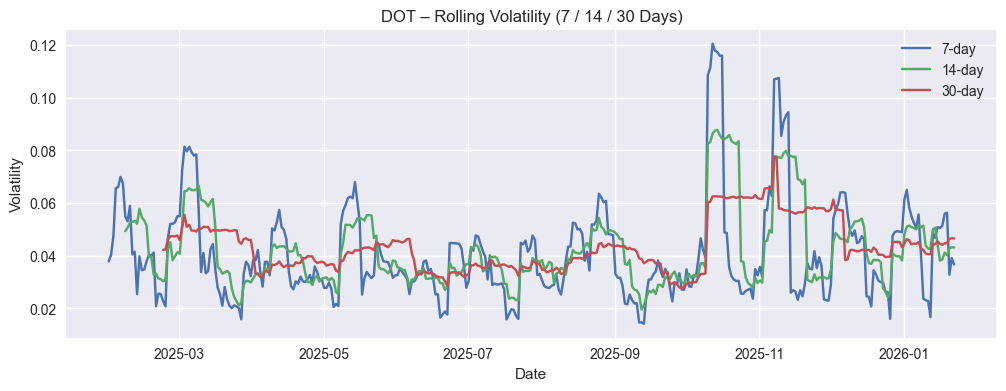

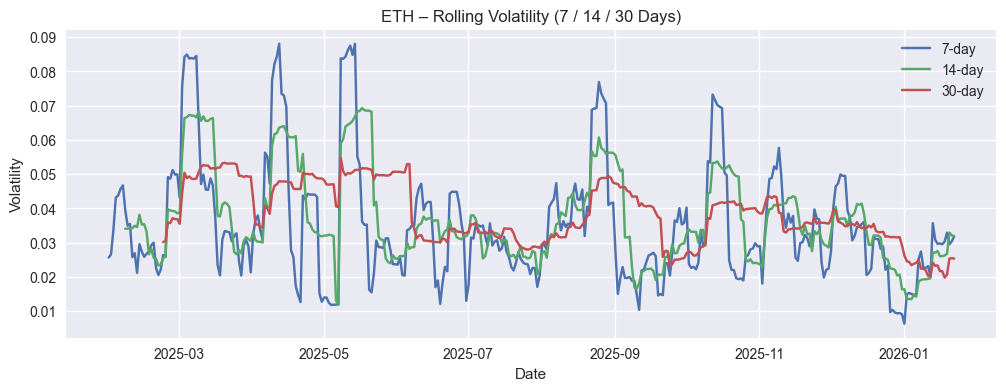

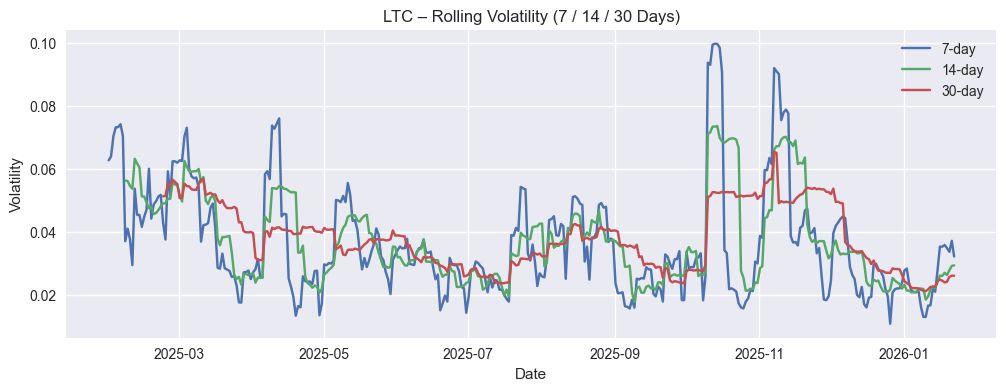

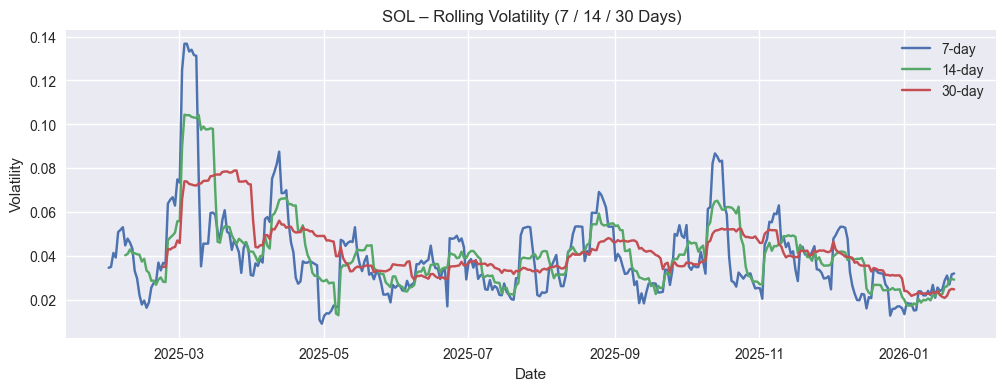

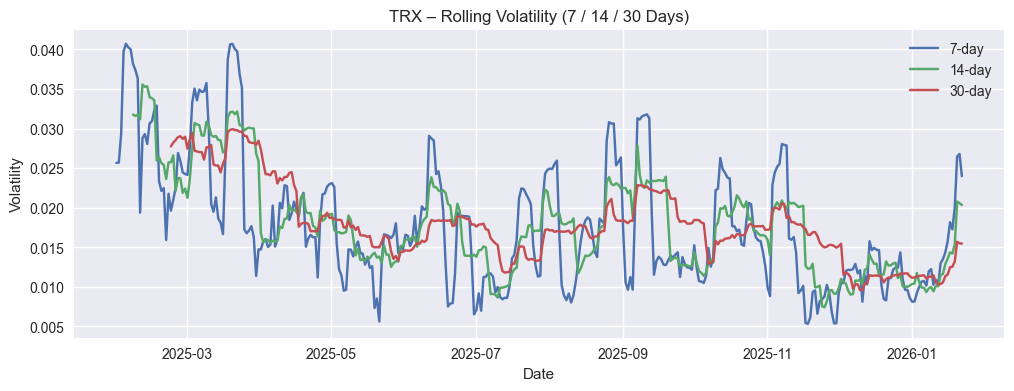

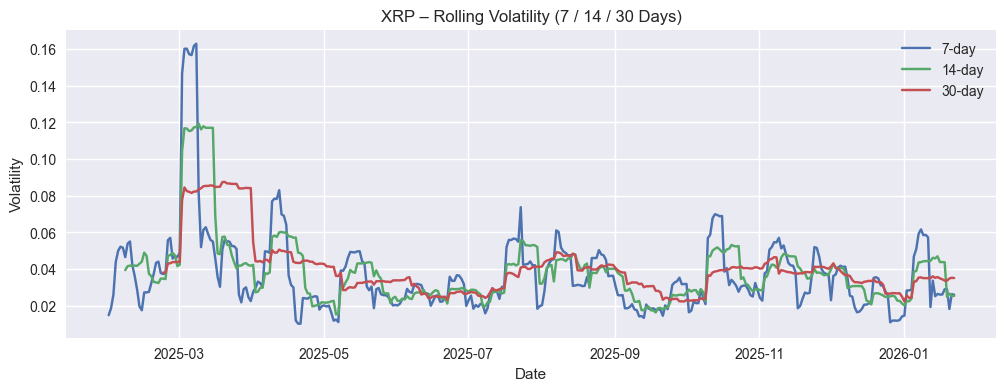

In [9]:
coins = df["coin"].unique()

for coin in coins:
    coin_df = df[df["coin"] == coin]

    plt.figure(figsize=(12, 4))
    plt.plot(coin_df["date"], coin_df["volatility_7d"], label="7-day")
    plt.plot(coin_df["date"], coin_df["volatility_14d"], label="14-day")
    plt.plot(coin_df["date"], coin_df["volatility_30d"], label="30-day")

    plt.title(f"{coin} – Rolling Volatility (7 / 14 / 30 Days)")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.show()

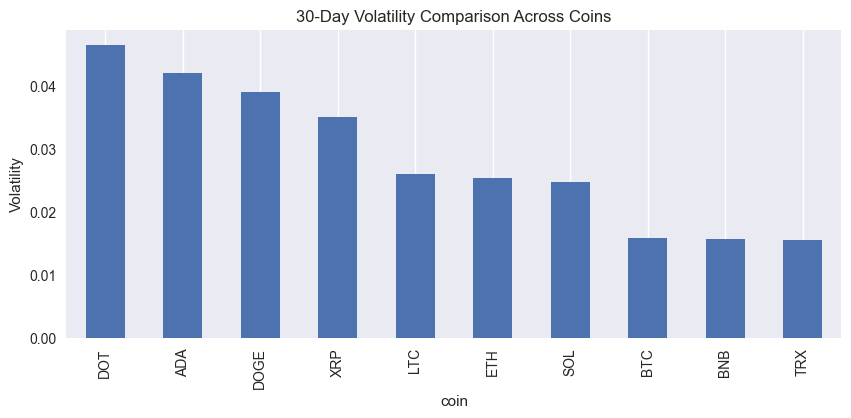

In [10]:
latest_vol = (
    df.groupby("coin")["volatility_30d"]
      .last()
      .sort_values(ascending=False)
)

latest_vol.plot(kind="bar", figsize=(10, 4))
plt.title("30-Day Volatility Comparison Across Coins")
plt.ylabel("Volatility")
plt.grid(axis="y")
plt.show()

In [11]:
volatility_summary = (
    df.groupby("coin")[["volatility_7d", "volatility_14d", "volatility_30d"]]
      .mean()
      .round(4)
      .sort_values("volatility_30d", ascending=False)
)

volatility_summary

volatility_7d  volatility_14d  volatility_30d
coin                                               
ADA          0.0447          0.0476          0.0510
DOGE         0.0447          0.0465          0.0478
DOT          0.0408          0.0423          0.0434
SOL          0.0396          0.0409          0.0424
XRP          0.0369          0.0388          0.0401
ETH          0.0351          0.0368          0.0384
LTC          0.0362          0.0370          0.0379
BNB          0.0241          0.0250          0.0256
BTC          0.0196          0.0202          0.0208
TRX          0.0178          0.0180          0.0179

### Volatility Analysis Insights

- Short-term volatility (7-day) shows frequent spikes, indicating market sensitivity.
- 14-day volatility smooths sudden fluctuations and highlights trend shifts.
- 30-day volatility reflects long-term risk stability.

Coins with consistently higher 30-day volatility are riskier for long-term investors,
while coins with lower volatility are comparatively stable.

In [ ]:
## Bollinger Bands

In [12]:
df["daily_return"] = (
    df.groupby("coin")["close"]
      .pct_change()
)

In [13]:
for window in [7, 14, 30]:
    df[f"volatility_{window}d"] = (
        df.groupby("coin")["daily_return"]
          .rolling(window)
          .std()
          .reset_index(level=0, drop=True)
    )

In [14]:
window = 20

df["ma_20"] = (
    df.groupby("coin")["close"]
      .rolling(window)
      .mean()
      .reset_index(level=0, drop=True)
)

In [15]:
df["std_20"] = (
    df.groupby("coin")["close"]
      .rolling(20)
      .std()
      .reset_index(level=0, drop=True)
)

df["bb_upper"] = df["ma_20"] + 2 * df["std_20"]
df["bb_lower"] = df["ma_20"] - 2 * df["std_20"]

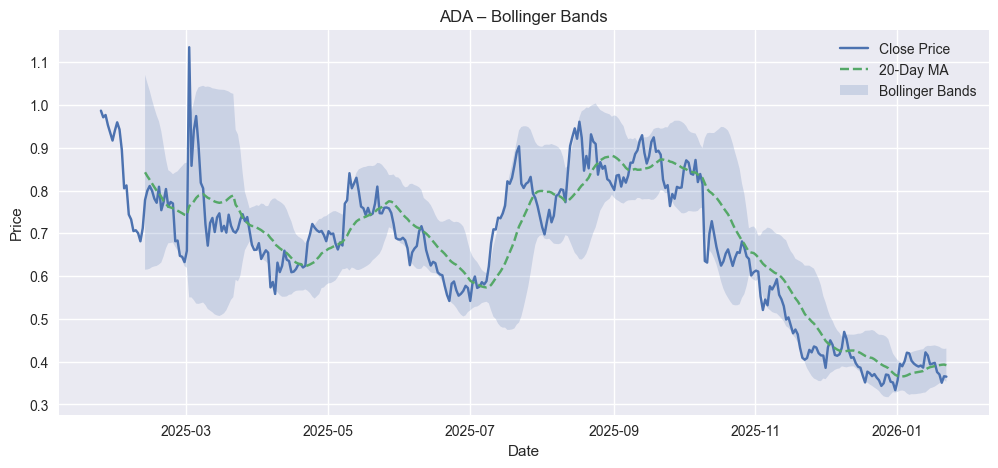

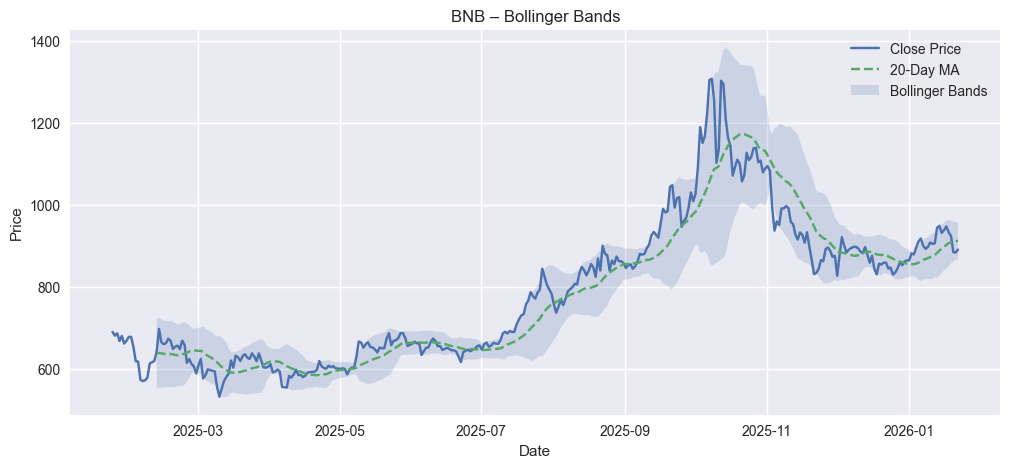

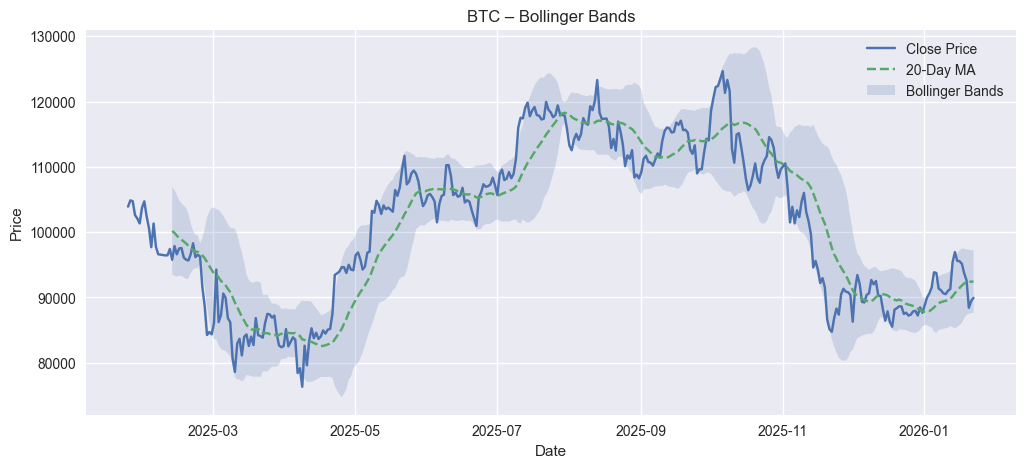

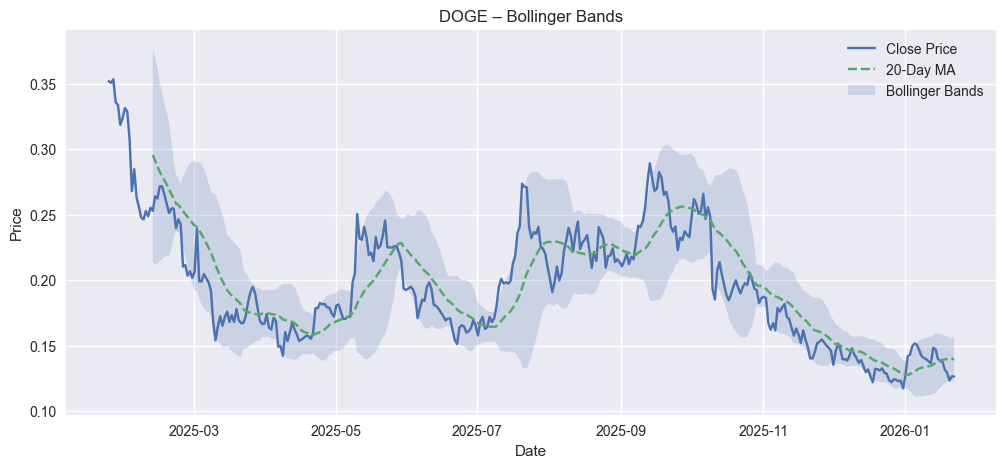

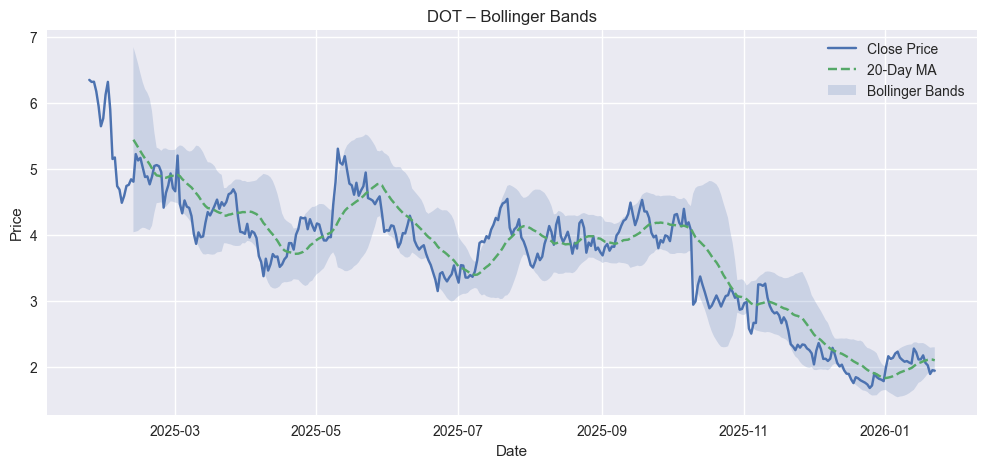

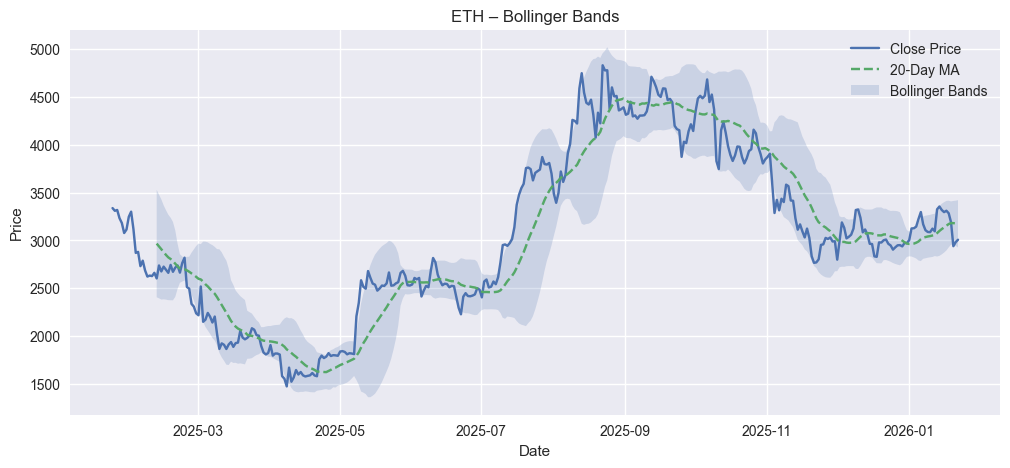

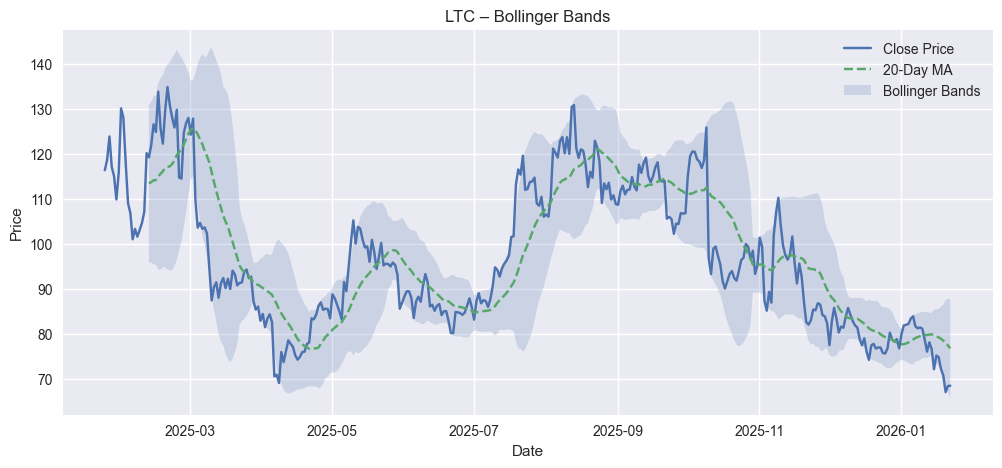

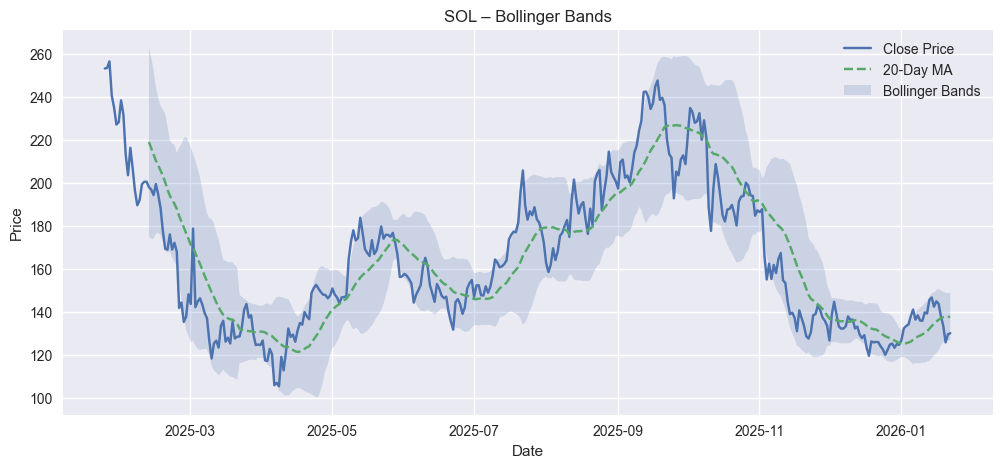

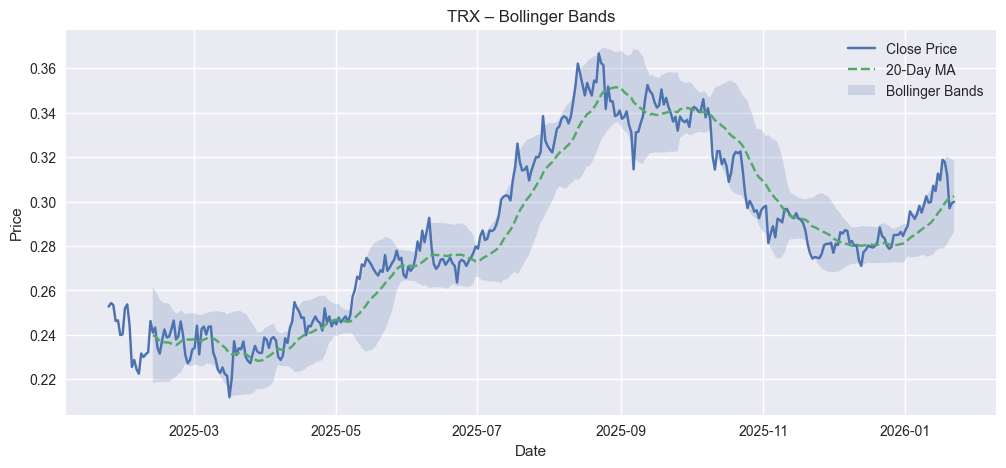

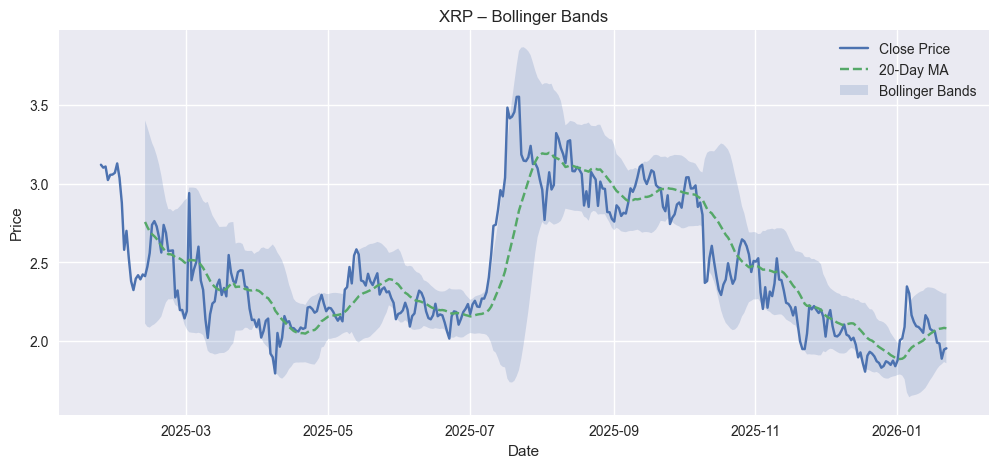

In [16]:
for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]

    plt.figure(figsize=(12, 5))
    plt.plot(coin_df["date"], coin_df["close"], label="Close Price")
    plt.plot(coin_df["date"], coin_df["ma_20"], label="20-Day MA", linestyle="--")

    plt.fill_between(
        coin_df["date"],
        coin_df["bb_upper"],
        coin_df["bb_lower"],
        alpha=0.2,
        label="Bollinger Bands"
    )

    plt.title(f"{coin} – Bollinger Bands")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
df["above_upper_band"] = df["close"] > df["bb_upper"]
df["below_lower_band"] = df["close"] < df["bb_lower"]

df[["date", "coin", "close", "above_upper_band", "below_lower_band"]].head()

date coin   close  above_upper_band  below_lower_band
0 2025-01-23 05:30:00  ADA  0.9867             False             False
1 2025-01-24 05:30:00  ADA  0.9712             False             False
2 2025-01-25 05:30:00  ADA  0.9766             False             False
3 2025-01-26 05:30:00  ADA  0.9530             False             False
4 2025-01-27 05:30:00  ADA  0.9345             False             False

In [18]:
breakout_summary = (
    df.groupby("coin")[["above_upper_band", "below_lower_band"]]
      .sum()
)

breakout_summary

above_upper_band  below_lower_band
coin                                    
ADA                 20                18
BNB                 32                13
BTC                 21                18
DOGE                23                20
DOT                 16                17
ETH                 26                19
LTC                 18                24
SOL                 21                18
TRX                 27                 9
XRP                 19                13

### Bollinger Band Insights

- Prices touching or crossing the upper band indicate overbought conditions.
- Lower band breakouts suggest oversold conditions or panic selling.
- Coins with frequent band breakouts show higher instability.
- Bollinger Bands visually confirm volatility spikes detected earlier.

In [ ]:
# VOLATILITY SPIKE DETECTION

In [19]:
# Threshold per coin
vol_threshold = (
    df.groupby("coin")["volatility_30d"]
      .transform(lambda x: x.mean() + 2 * x.std())
)

df["volatility_spike"] = df["volatility_30d"] > vol_threshold

In [20]:
spike_counts = (
    df.groupby("coin")["volatility_spike"]
      .sum()
      .sort_values(ascending=False)
)

spike_counts

coin
ADA     30
XRP     30
SOL     29
BNB     28
TRX     24
BTC     21
DOT      7
LTC      2
DOGE     1
ETH      0
Name: volatility_spike, dtype: int64

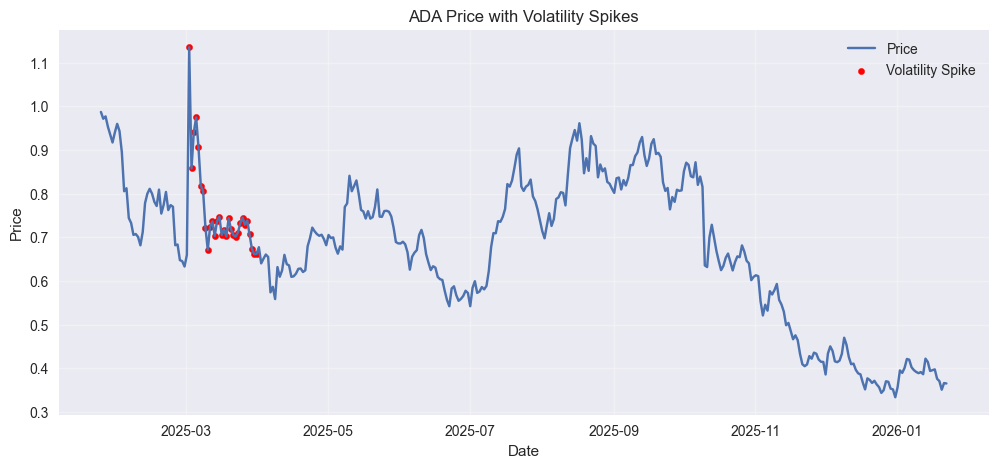

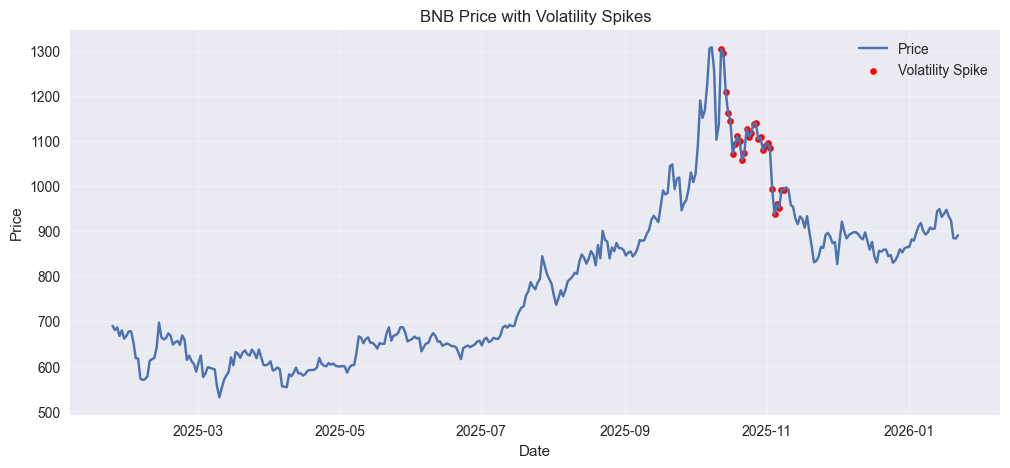

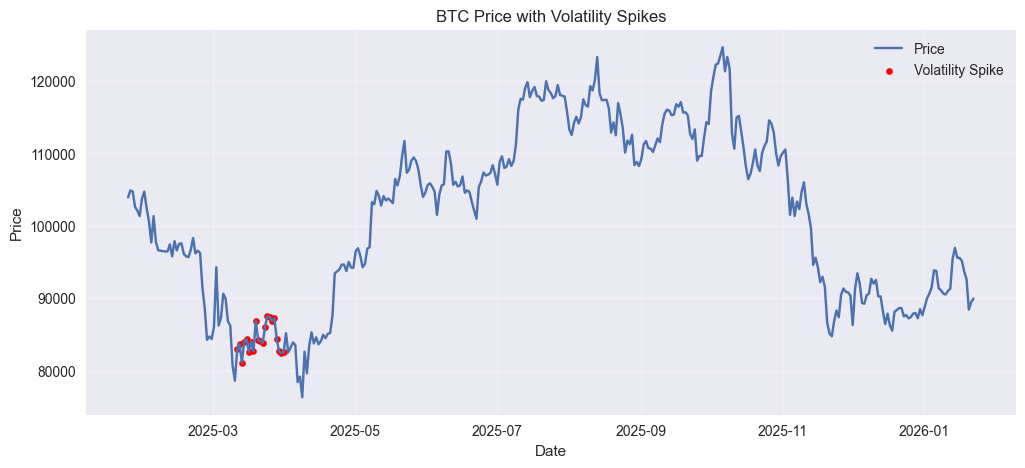

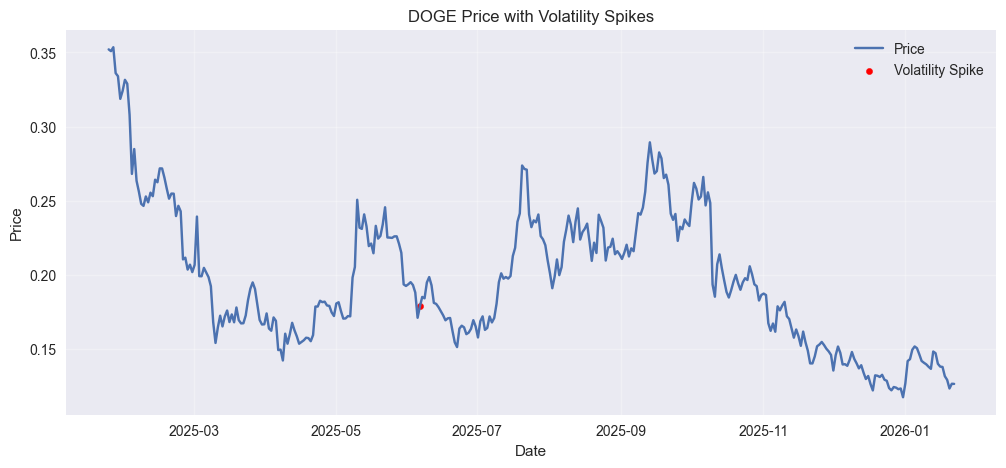

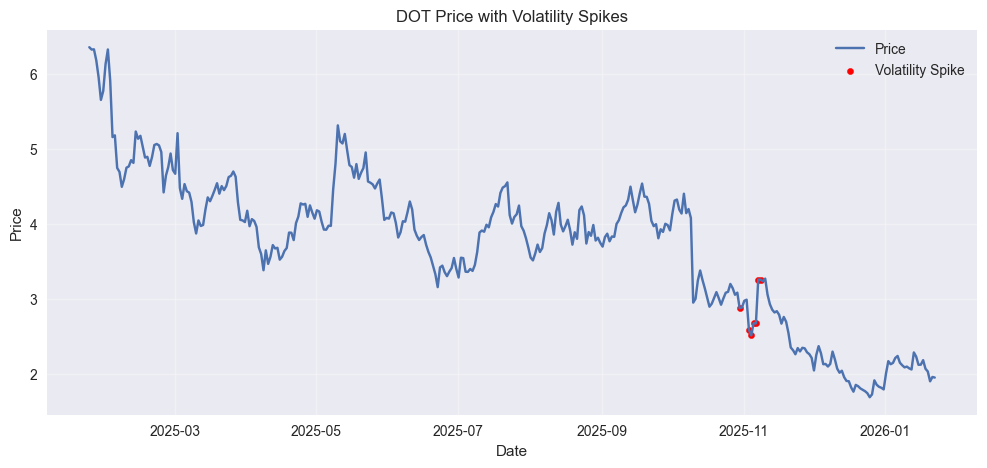

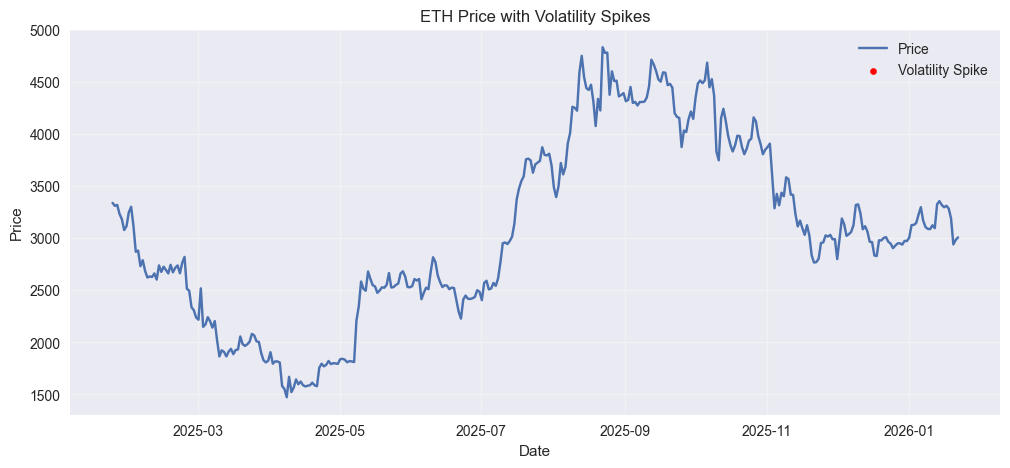

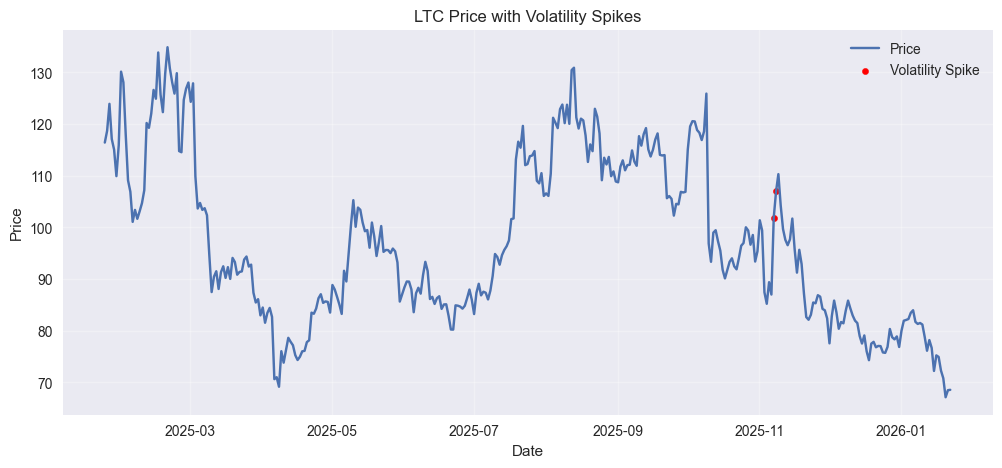

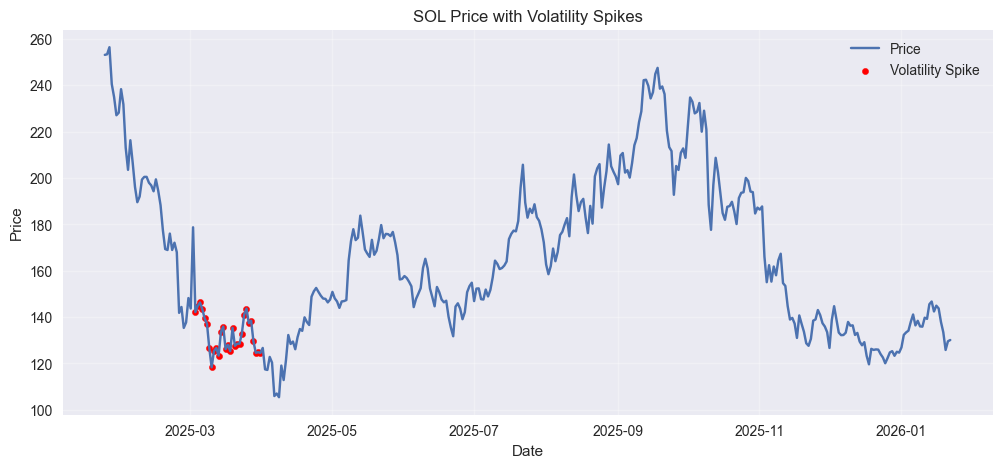

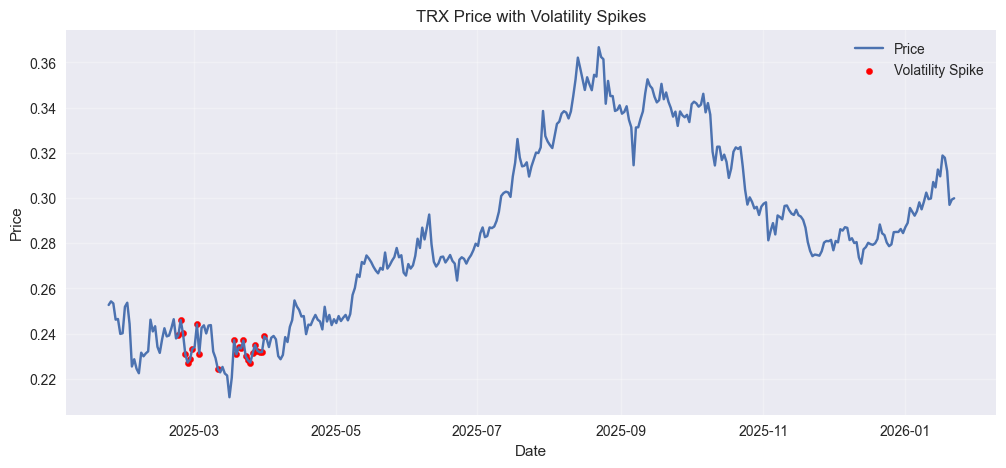

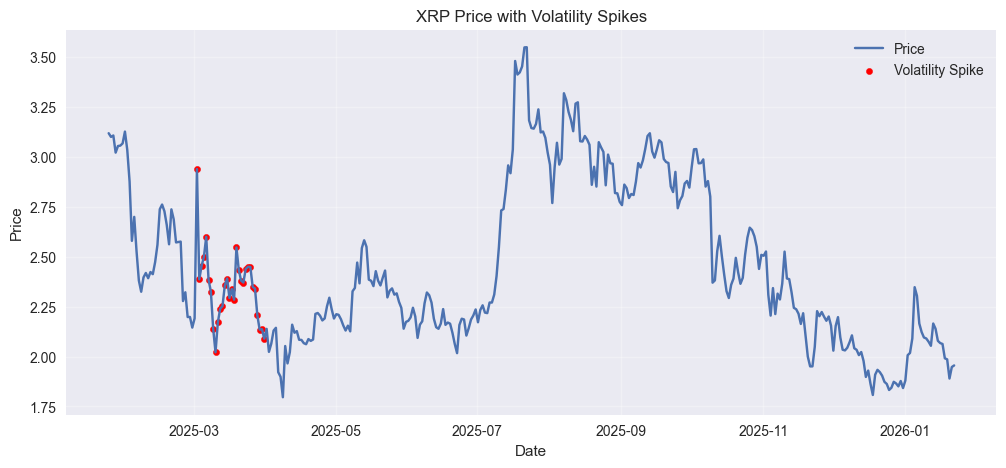

In [21]:
for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]

    plt.figure(figsize=(12,5))
    plt.plot(coin_df["date"], coin_df["close"], label="Price")
    
    spikes = coin_df[coin_df["volatility_spike"]]
    plt.scatter(
        spikes["date"],
        spikes["close"],
        color="red",
        label="Volatility Spike",
        s=20
    )

    plt.title(f"{coin} Price with Volatility Spikes")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [22]:
df["risk_level"] = "Low"

threshold = df["volatility_14d"].quantile(0.75)

df.loc[df["volatility_14d"] > threshold, "risk_level"] = "High"

In [23]:
df[["coin", "volatility_14d", "risk_level"]].dropna().head(10)

coin  volatility_14d risk_level
14  ADA        0.036011        Low
15  ADA        0.036639        Low
16  ADA        0.035991        Low
17  ADA        0.036010        Low
18  ADA        0.040368        Low
19  ADA        0.050112       High
20  ADA        0.050263       High
21  ADA        0.049960       High
22  ADA        0.049932       High
23  ADA        0.048740       High

In [24]:
df["risk_level"].value_counts()

risk_level
Low     2772
High     878
Name: count, dtype: int64

In [ ]:
# SENTIMENT vs VOLATILITY ANALYSIS

In [10]:
price_df = pd.read_csv(
    "../data/processed/processed_data.csv",
    parse_dates=["date"]
)

sentiment_df = pd.read_csv(
    "../data/sentiment/processed/news_processed.csv",
    parse_dates=["date"]
)

price_df["coin"] = price_df["coin"].str.upper()
sentiment_df["coin"] = sentiment_df["coin"].str.upper()

In [11]:
price_df["date"] = pd.to_datetime(price_df["date"]).dt.date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

In [12]:
daily_sentiment = (
    sentiment_df
    .groupby(["coin", "date"])
    .agg(
        avg_sentiment=("sentiment_score", "mean"),
        sentiment_count=("sentiment_score", "count")
    )
    .reset_index()
)

In [13]:
daily_sentiment = daily_sentiment.sort_values(["coin", "date"])

for window in [7, 14, 30]:
    daily_sentiment[f"sentiment_{window}d"] = (
        daily_sentiment
        .groupby("coin")["avg_sentiment"]
        .rolling(window)
        .mean()
        .reset_index(level=0, drop=True)
    )

In [14]:
analysis_df = pd.merge(
    price_df,
    daily_sentiment,
    on=["coin", "date"],
    how="left"
)

In [15]:
analysis_df.shape
analysis_df.head()


date coin    open    high     low   close       volume  \
0  2025-01-23  ADA  0.9827  1.0118  0.9512  0.9867  192569354.5   
1  2025-01-24  ADA  0.9867  1.0100  0.9636  0.9712  124426928.3   
2  2025-01-25  ADA  0.9712  0.9919  0.9642  0.9766   56721656.8   
3  2025-01-26  ADA  0.9766  1.0003  0.9515  0.9530   73197919.3   
4  2025-01-27  ADA  0.9530  0.9587  0.8568  0.9345  257950415.8   

   avg_sentiment  sentiment_count  sentiment_7d  sentiment_14d  sentiment_30d  
0            NaN              NaN           NaN            NaN            NaN  
1         0.6966              2.0      0.486110       0.610825            NaN  
2         0.0000              2.0      0.364953       0.547098            NaN  
3            NaN              NaN           NaN            NaN            NaN  
4            NaN              NaN           NaN            NaN            NaN

In [16]:
analysis_df = analysis_df.dropna().copy()

coins = analysis_df["coin"].unique()
print("Coins analyzed:", coins)

Coins analyzed: ['ADA' 'BTC' 'ETH' 'SOL' 'XRP']


In [17]:
analysis_df = analysis_df.sort_values(["coin", "date"]).copy()

In [18]:
analysis_df = analysis_df.sort_values(["coin", "date"]).reset_index(drop=True)

In [19]:
analysis_df["log_return"] = (
    analysis_df
    .groupby("coin")["close"]
    .transform(lambda x: np.log(x / x.shift(1)))
)

analysis_df["volatility_14d"] = (
    analysis_df
    .groupby("coin")["log_return"]
    .transform(lambda x: x.rolling(14).std())
)


In [20]:
analysis_df["future_vol_7d"]  = analysis_df.groupby("coin")["volatility_14d"].shift(-7)
analysis_df["future_vol_14d"] = analysis_df.groupby("coin")["volatility_14d"].shift(-14)
analysis_df["future_vol_30d"] = analysis_df.groupby("coin")["volatility_14d"].shift(-30)

In [21]:
analysis_df_valid = analysis_df.dropna(
    subset=["future_vol_7d", "future_vol_14d", "future_vol_30d"]
).copy()

analysis_df_valid.shape


(121, 17)

In [22]:
results = []

for coin in analysis_df_valid["coin"].unique():
    df = analysis_df_valid[analysis_df_valid["coin"] == coin]

    if len(df) < 0:
        continue

    results.append({
        "coin": coin,
        "sent_vs_vol_7d":  df["avg_sentiment"].corr(df["future_vol_7d"]),
        "sent_vs_vol_14d": df["avg_sentiment"].corr(df["future_vol_14d"]),
        "sent_vs_vol_30d": df["avg_sentiment"].corr(df["future_vol_30d"]),
    })

corr_df = pd.DataFrame(results).set_index("coin")
corr_df

sent_vs_vol_7d  sent_vs_vol_14d  sent_vs_vol_30d
coin                                                  
ADA         0.119887        -0.445477        -0.126393
BTC        -0.134420         0.004396         0.229020
ETH        -0.194073        -0.162267        -0.007100
SOL         0.083278        -0.103296        -0.310051
XRP         0.047027         0.382829        -0.302713

In [23]:
corr_df["max_sensitivity"] = corr_df.abs().max(axis=1)
corr_df.sort_values("max_sensitivity", ascending=False)

sent_vs_vol_7d  sent_vs_vol_14d  sent_vs_vol_30d  max_sensitivity
coin                                                                   
ADA         0.119887        -0.445477        -0.126393         0.445477
XRP         0.047027         0.382829        -0.302713         0.382829
SOL         0.083278        -0.103296        -0.310051         0.310051
BTC        -0.134420         0.004396         0.229020         0.229020
ETH        -0.194073        -0.162267        -0.007100         0.194073

In [24]:
for h in [7, 14, 30]:
    analysis_df[f"future_vol_{h}d"] = (
        analysis_df.groupby("coin")["volatility_14d"].shift(-h)
    )

    analysis_df[f"future_return_{h}d"] = (
        analysis_df.groupby("coin")["close"].shift(-h) / analysis_df["close"] - 1
    )

In [25]:
analysis_df_valid = analysis_df.dropna(
    subset=[
        "avg_sentiment",
        "future_vol_7d", "future_vol_14d", "future_vol_30d",
        "future_return_7d", "future_return_14d", "future_return_30d"
    ]
).copy()

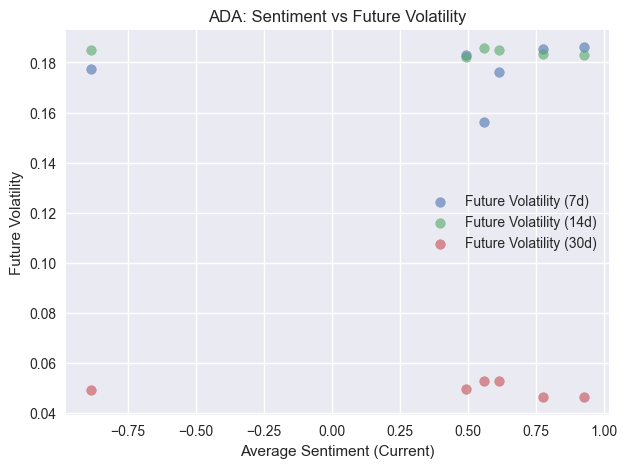

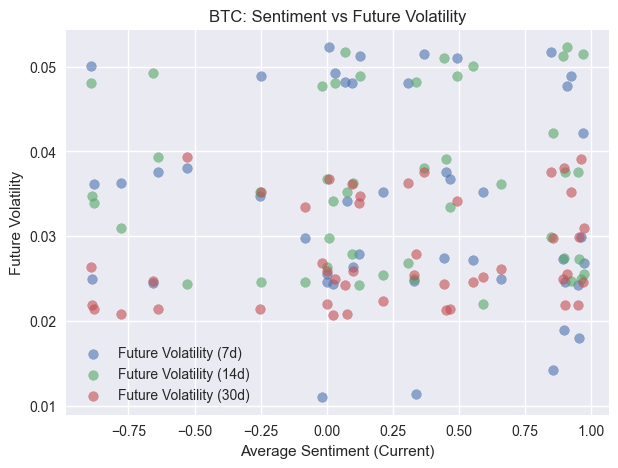

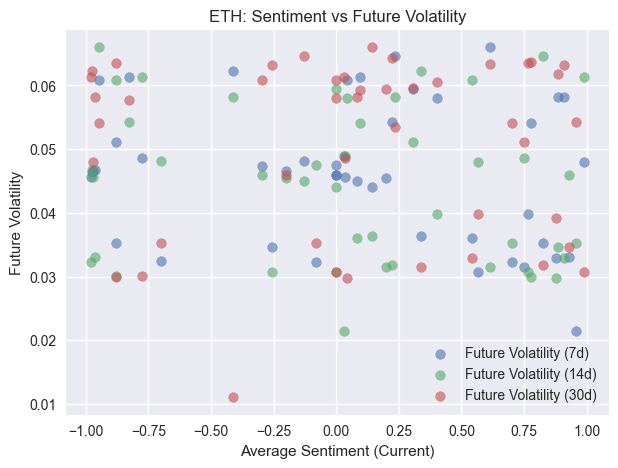

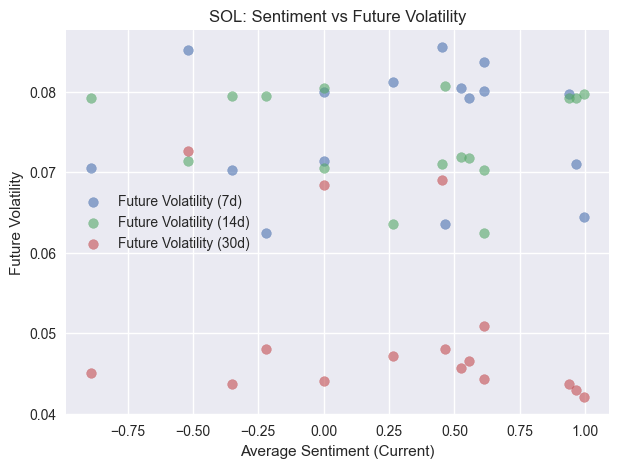

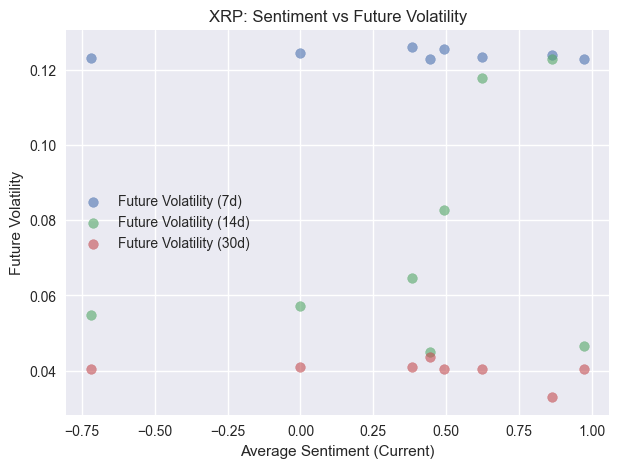

In [26]:
coins = analysis_df_valid["coin"].unique()

for coin in coins:
    df = analysis_df_valid[analysis_df_valid["coin"] == coin]

    if len(df) < 0:
        continue

    plt.figure(figsize=(7, 5))

    plt.scatter(
        df["avg_sentiment"],
        df["future_vol_7d"],
        alpha=0.6,
        label="Future Volatility (7d)"
    )

    plt.scatter(
        df["avg_sentiment"],
        df["future_vol_14d"],
        alpha=0.6,
        label="Future Volatility (14d)"
    )

    plt.scatter(
        df["avg_sentiment"],
        df["future_vol_30d"],
        alpha=0.6,
        label="Future Volatility (30d)"
    )

    plt.xlabel("Average Sentiment (Current)")
    plt.ylabel("Future Volatility")
    plt.title(f"{coin}: Sentiment vs Future Volatility")
    plt.legend()
    plt.show()

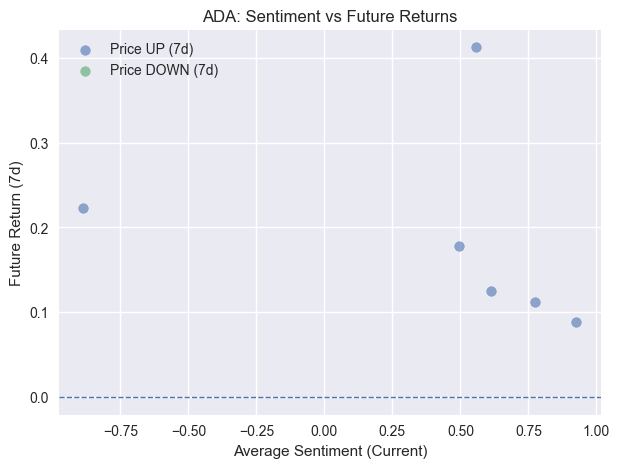

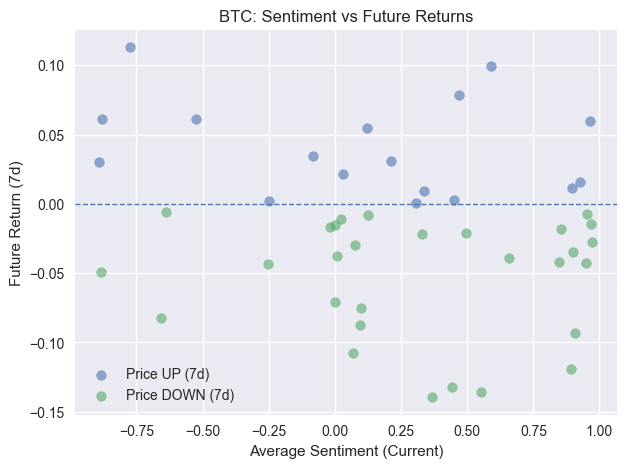

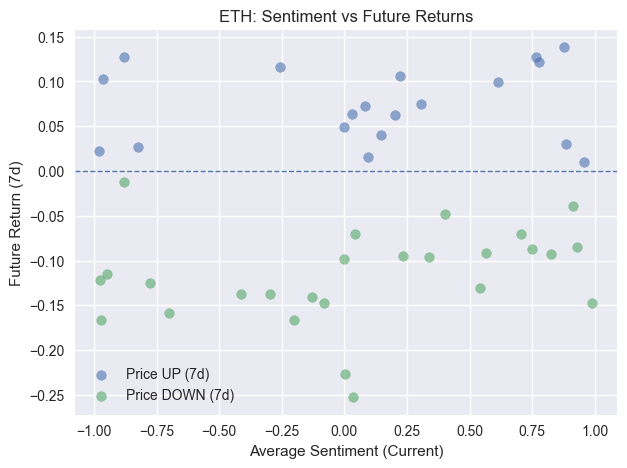

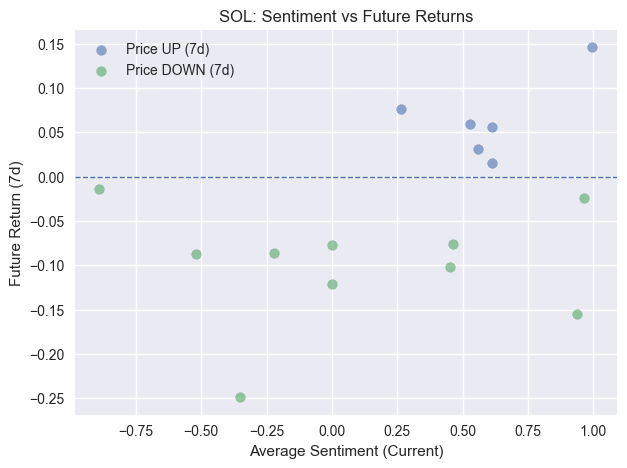

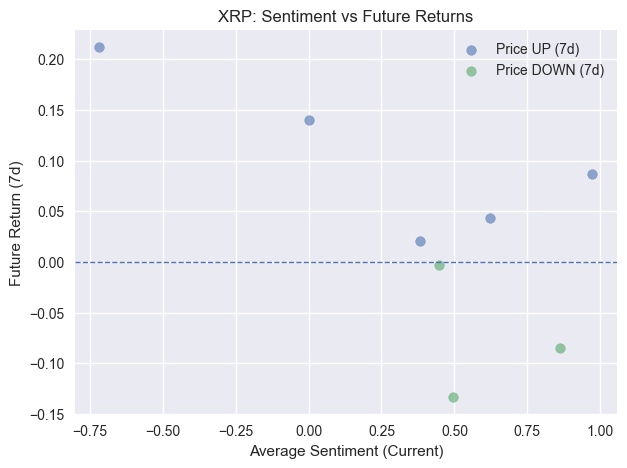

In [27]:
for coin in coins:
    df = analysis_df_valid[analysis_df_valid["coin"] == coin]

    if len(df) < 0:
        continue

    plt.figure(figsize=(7, 5))

    up = df[df["future_return_7d"] > 0]
    down = df[df["future_return_7d"] <= 0]

    plt.scatter(
        up["avg_sentiment"],
        up["future_return_7d"],
        label="Price UP (7d)",
        alpha=0.6
    )

    plt.scatter(
        down["avg_sentiment"],
        down["future_return_7d"],
        label="Price DOWN (7d)",
        alpha=0.6
    )

    plt.axhline(0, linestyle="--", linewidth=1)
    plt.xlabel("Average Sentiment (Current)")
    plt.ylabel("Future Return (7d)")
    plt.title(f"{coin}: Sentiment vs Future Returns")
    plt.legend()
    plt.show()

In [28]:
summary = (
    analysis_df_valid
    .groupby("coin")
    .agg(
        avg_sentiment=("avg_sentiment", "mean"),
        vol_7d=("future_vol_7d", "mean"),
        vol_14d=("future_vol_14d", "mean"),
        vol_30d=("future_vol_30d", "mean"),
    )
    .dropna()
)

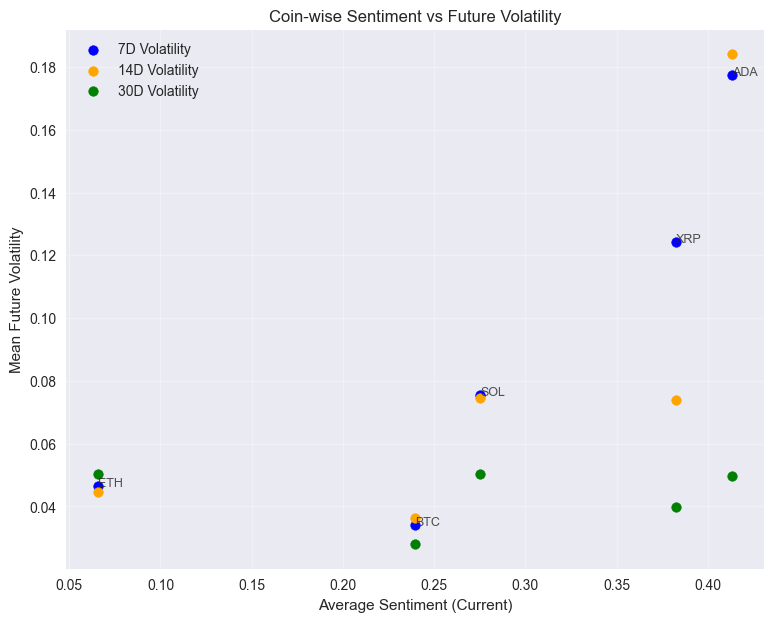

In [29]:
plt.figure(figsize=(9, 7))

plt.scatter(summary["avg_sentiment"], summary["vol_7d"], c="blue", label="7D Volatility")
plt.scatter(summary["avg_sentiment"], summary["vol_14d"], c="orange", label="14D Volatility")
plt.scatter(summary["avg_sentiment"], summary["vol_30d"], c="green", label="30D Volatility")

# label coins (use 7D point to anchor text)
for coin in summary.index:
    plt.text(
        summary.loc[coin, "avg_sentiment"],
        summary.loc[coin, "vol_7d"],
        coin,
        fontsize=9,
        alpha=0.8
    )

plt.xlabel("Average Sentiment (Current)")
plt.ylabel("Mean Future Volatility")
plt.title("Coin-wise Sentiment vs Future Volatility")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [30]:
reg_df = analysis_df_valid[
    [
        "coin",
        "avg_sentiment",
        "future_vol_7d",
        "future_vol_14d",
        "future_vol_30d"
    ]
].dropna()

reg_df.head()

coin  avg_sentiment  future_vol_7d  future_vol_14d  future_vol_30d
7   ADA         0.5574       0.156108        0.185577        0.052981
8   ADA         0.6124       0.176205        0.185151        0.052836
9   ADA        -0.8860       0.177480        0.185174        0.049312
10  ADA         0.4939       0.183121        0.182364        0.049897
11  ADA         0.9268       0.186085        0.182927        0.046418

In [31]:
results = []

for coin in reg_df["coin"].unique():
    df = reg_df[reg_df["coin"] == coin]

    if len(df) < 0:   # avoid junk regressions
        continue

    X = df[["avg_sentiment"]].values

    for horizon in ["future_vol_7d", "future_vol_14d", "future_vol_30d"]:
        y = df[horizon].values

        model = LinearRegression()
        model.fit(X, y)

        results.append({
            "coin": coin,
            "horizon": horizon,
            "coef": model.coef_[0],
            "intercept": model.intercept_,
            "r2": model.score(X, y)
        })

vol_reg_results = pd.DataFrame(results)
vol_reg_results

coin         horizon      coef  intercept        r2
0   ADA   future_vol_7d  0.002046   0.176550  0.014373
1   ADA  future_vol_14d -0.000936   0.184466  0.198450
2   ADA  future_vol_30d -0.000553   0.049904  0.015975
3   BTC   future_vol_7d -0.002852   0.034794  0.018069
4   BTC  future_vol_14d  0.000077   0.036243  0.000019
5   BTC  future_vol_30d  0.002496   0.027333  0.052450
6   ETH   future_vol_7d -0.003336   0.046606  0.037664
7   ETH  future_vol_14d -0.003088   0.044750  0.026331
8   ETH  future_vol_30d -0.000156   0.050389  0.000050
9   SOL   future_vol_7d  0.001167   0.075221  0.006935
10  SOL  future_vol_14d -0.001125   0.074714  0.010670
11  SOL  future_vol_30d -0.005660   0.051720  0.096132
12  XRP   future_vol_7d  0.000107   0.124096  0.002212
13  XRP  future_vol_14d  0.022169   0.065540  0.146558
14  XRP  future_vol_30d -0.001731   0.040606  0.091635

In [32]:
vol_reg_pivot = vol_reg_results.pivot(
    index="coin",
    columns="horizon",
    values="r2"
)

vol_reg_pivot.sort_values("future_vol_7d", ascending=False)

horizon  future_vol_14d  future_vol_30d  future_vol_7d
coin                                                  
ETH            0.026331        0.000050       0.037664
BTC            0.000019        0.052450       0.018069
ADA            0.198450        0.015975       0.014373
SOL            0.010670        0.096132       0.006935
XRP            0.146558        0.091635       0.002212

In [33]:
analysis_df_valid["future_return_7d"] = (
    analysis_df_valid
    .groupby("coin")["close"]
    .pct_change(7)
    .shift(-7)
)

In [34]:
analysis_df_valid["future_up_7d"] = (
    analysis_df_valid["future_return_7d"] > 0
).astype(int)

In [35]:
logit_results = []

for coin in analysis_df_valid["coin"].unique():
    df = analysis_df_valid[
        (analysis_df_valid["coin"] == coin) &
        (~analysis_df_valid["future_up_7d"].isna())
    ]

    if len(df) < 10:
        continue

    X = df[["avg_sentiment"]].values
    y = df["future_up_7d"].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LogisticRegression()
    model.fit(X_scaled, y)

    preds = model.predict(X_scaled)

    logit_results.append({
        "coin": coin,
        "coef": model.coef_[0][0],
        "accuracy": accuracy_score(y, preds)
    })

logit_df = pd.DataFrame(logit_results)
logit_df.sort_values("accuracy", ascending=False)

coin      coef  accuracy
0  BTC -0.152754  0.760870
2  SOL  0.730465  0.750000
1  ETH -0.137853  0.733333

In [36]:
final_ranking = (
    vol_reg_pivot
    .merge(logit_df.set_index("coin"), left_index=True, right_index=True)
    .sort_values("accuracy", ascending=False)
)

final_ranking

future_vol_14d  future_vol_30d  future_vol_7d      coef  accuracy
coin                                                                   
BTC         0.000019        0.052450       0.018069 -0.152754  0.760870
SOL         0.010670        0.096132       0.006935  0.730465  0.750000
ETH         0.026331        0.000050       0.037664 -0.137853  0.733333

In [37]:
analysis_df = analysis_df.sort_values(["coin", "date"]).copy()

analysis_df["future_return_7d"] = (
    analysis_df.groupby("coin")["close"]
    .transform(lambda x: x.shift(-7) / x - 1)
)

analysis_df["future_return_14d"] = (
    analysis_df.groupby("coin")["close"]
    .transform(lambda x: x.shift(-14) / x - 1)
)

analysis_df["future_return_30d"] = (
    analysis_df.groupby("coin")["close"]
    .transform(lambda x: x.shift(-30) / x - 1)
)

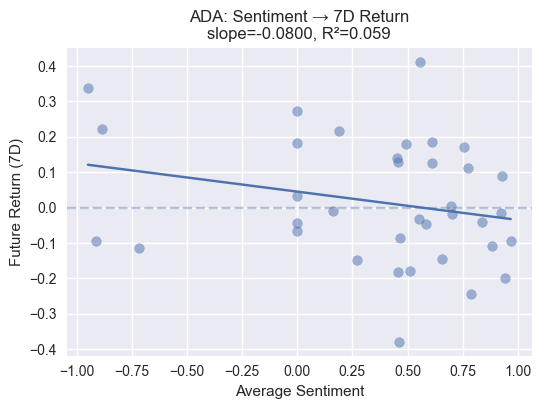

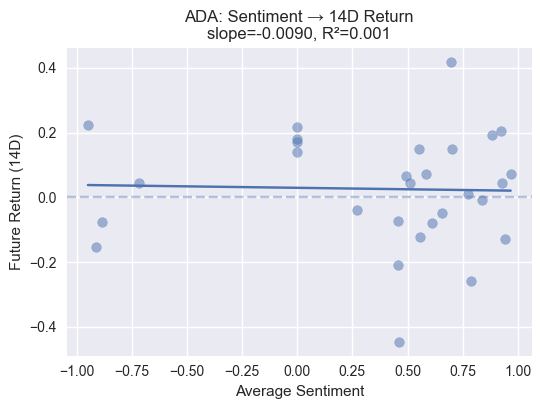

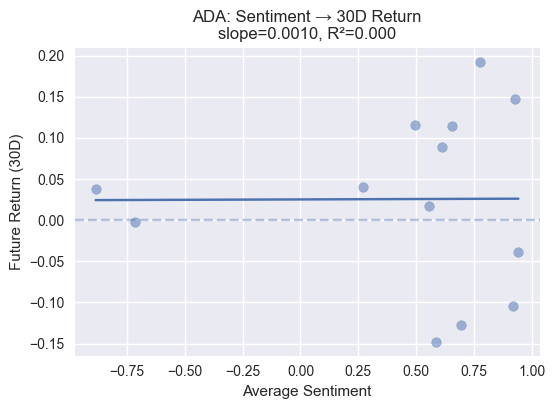

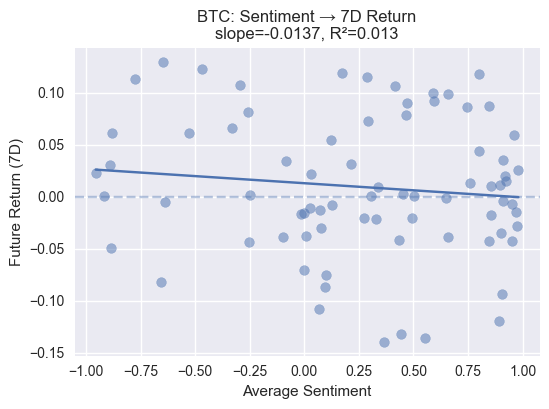

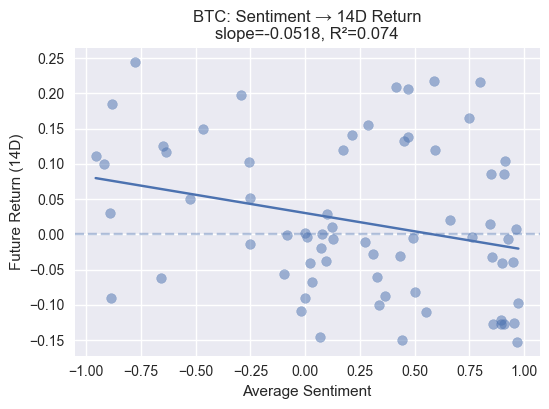

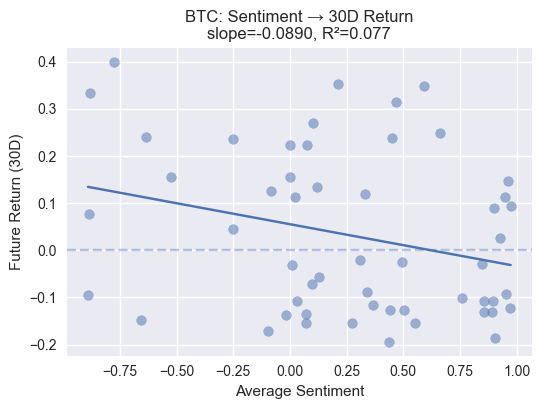

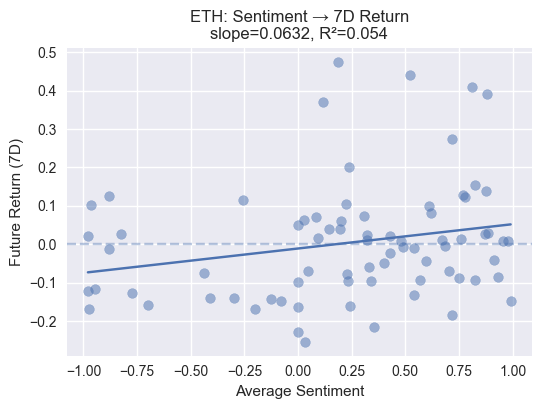

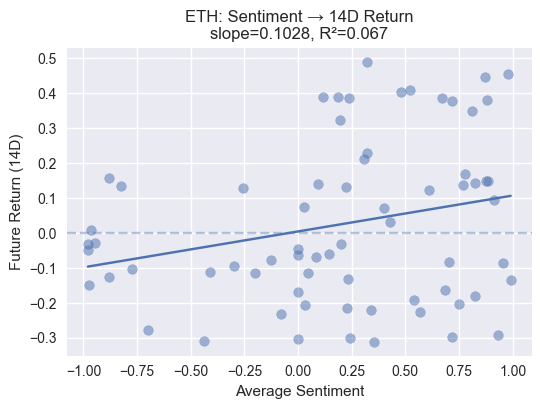

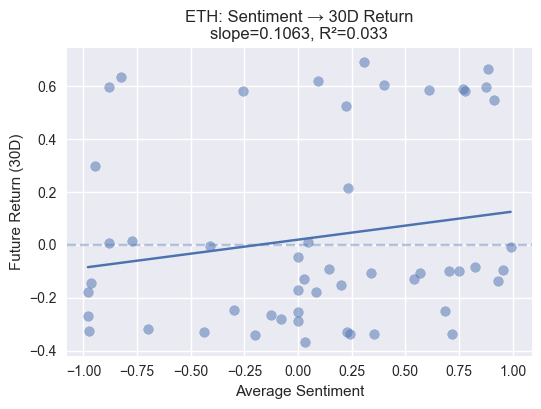

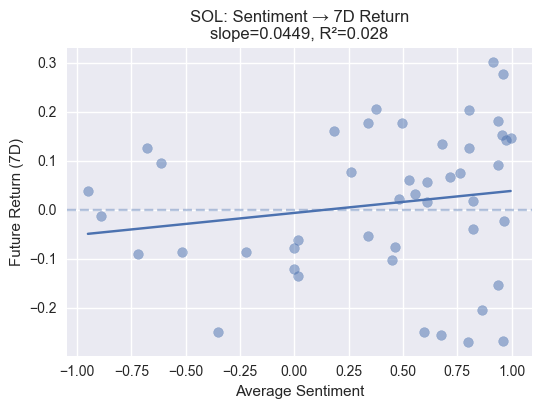

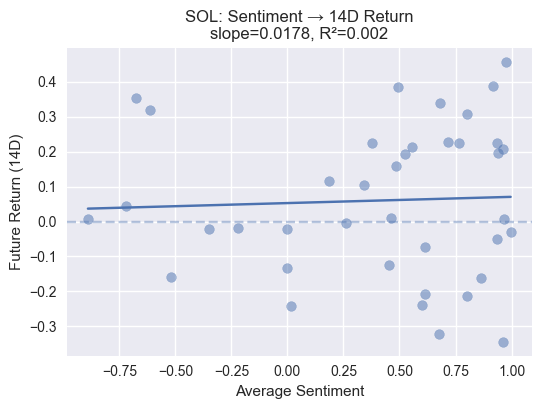

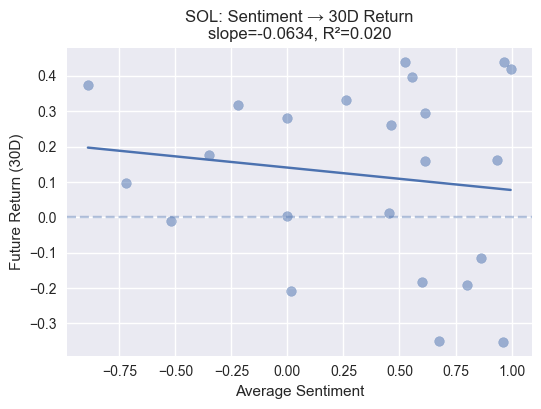

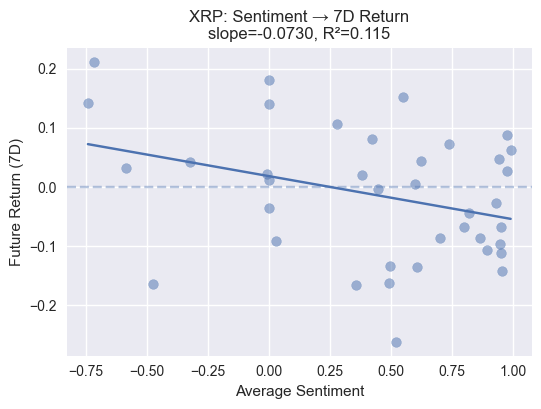

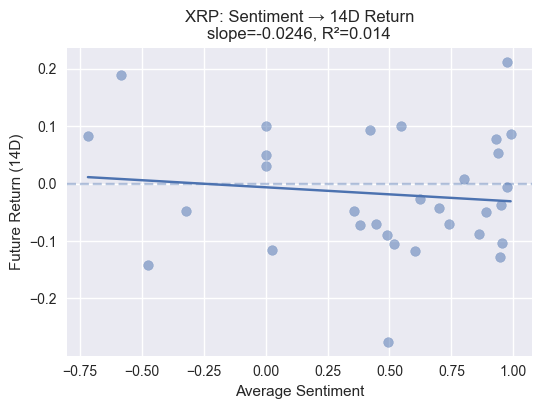

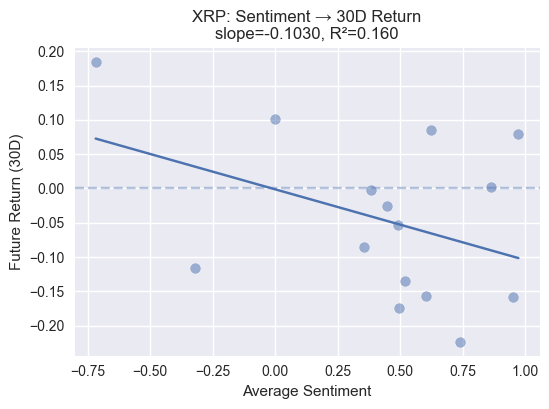

In [38]:
horizons = {
    "7D": "future_return_7d",
    "14D": "future_return_14d",
    "30D": "future_return_30d",
}

for coin, df in analysis_df.groupby("coin"):

    for label, target in horizons.items():

        temp = df[["avg_sentiment", target]].dropna()

        if len(temp) < 0:
            continue

        x = temp["avg_sentiment"].values
        y = temp[target].values

        # regression
        m, b = np.polyfit(x, y, 1)
        y_pred = m * x + b
        r2 = r2_score(y, y_pred)

        # plot
        plt.figure(figsize=(6, 4))
        plt.scatter(x, y, alpha=0.5)
        plt.plot(np.sort(x), m * np.sort(x) + b)

        plt.axhline(0, linestyle="--", alpha=0.4)
        plt.xlabel("Average Sentiment")
        plt.ylabel(f"Future Return ({label})")
        plt.title(f"{coin}: Sentiment → {label} Return\nslope={m:.4f}, R²={r2:.3f}")
        plt.show()

In [39]:
rows = []

for coin, df in analysis_df.groupby("coin"):

    row = {"coin": coin}

    for label, target in horizons.items():
        temp = df[["avg_sentiment", target]].dropna()

        if len(temp) < 0:
            row[f"slope_{label}"] = np.nan
            row[f"r2_{label}"] = np.nan
            continue

        m, b = np.polyfit(temp["avg_sentiment"], temp[target], 1)
        r2 = r2_score(temp[target], m * temp["avg_sentiment"] + b)

        row[f"slope_{label}"] = m
        row[f"r2_{label}"] = r2

    rows.append(row)

ranking_df = pd.DataFrame(rows).set_index("coin")
ranking_df.sort_values("r2_7D", ascending=False)

slope_7D     r2_7D  slope_14D    r2_14D  slope_30D    r2_30D
coin                                                              
XRP  -0.073003  0.114543  -0.024635  0.013672  -0.103022  0.159759
ADA  -0.080022  0.059005  -0.009028  0.000881   0.000950  0.000027
ETH   0.063223  0.053942   0.102779  0.066627   0.106309  0.032544
SOL   0.044922  0.028146   0.017844  0.002069  -0.063443  0.019533
BTC  -0.013668  0.013253  -0.051816  0.074053  -0.088966  0.077425

In [40]:
SENT_WINDOW = 14
THRESHOLD = 0.15
HORIZONS = [7, 14, 30]

In [41]:
df = analysis_df.sort_values(["coin", "date"]).copy()

df["sentiment_smooth"] = (
    df.groupby("coin")["avg_sentiment"]
    .transform(lambda x: x.rolling(SENT_WINDOW).mean())
)

df["sentiment_mean"] = (
    df.groupby("coin")["sentiment_smooth"]
    .transform("mean")
)

df["signal"] = 0
df.loc[df["sentiment_smooth"] > df["sentiment_mean"] + THRESHOLD, "signal"] = 1
df.loc[df["sentiment_smooth"] < df["sentiment_mean"] - THRESHOLD, "signal"] = -1

In [42]:
for h in HORIZONS:
    df[f"future_return_{h}d"] = (
        df.groupby("coin")["close"]
        .transform(lambda x: x.shift(-h) / x - 1)
    )

In [43]:
for h in HORIZONS:
    df[f"strategy_return_{h}d"] = (
        df["signal"] * df[f"future_return_{h}d"]
    )

In [44]:
def safe_sharpe(x):
    if x.std() == 0 or len(x) < 20:
        return np.nan
    return x.mean() / x.std()

In [45]:
results = []

for coin, cdf in df.groupby("coin"):
    for h in HORIZONS:

        strat = cdf[f"strategy_return_{h}d"].dropna()
        market = cdf[f"future_return_{h}d"].dropna()

        if len(strat) < 0:
            continue

        results.append({
            "coin": coin,
            "horizon": f"{h}D",
            "trades": (cdf["signal"] != 0).sum(),
            "avg_strategy_return": strat.mean(),
            "avg_market_return": market.mean(),
            "win_rate": (strat > 0).mean(),
            "sharpe_like": safe_sharpe(strat)
        })

backtest_df = pd.DataFrame(results)
backtest_df.sort_values(["horizon", "sharpe_like"], ascending=[True, False])

coin horizon  trades  avg_strategy_return  avg_market_return  win_rate  \
7   ETH     14D      48             0.076571           0.024933  0.382353   
1   ADA     14D       4             0.009946           0.026100  0.068966   
10  SOL     14D       6             0.002084           0.059969  0.076923   
4   BTC     14D      29            -0.043780           0.017971  0.000000   
13  XRP     14D       3             0.000000          -0.017739  0.000000   
8   ETH     30D      48            -0.029434           0.029631  0.269231   
5   BTC     30D      29            -0.038654           0.032119  0.000000   
11  SOL     30D       6            -0.039780           0.119796  0.000000   
2   ADA     30D       4             0.000000           0.025599  0.000000   
14  XRP     30D       3             0.000000          -0.045185  0.000000   
6   ETH      7D      48             0.038956           0.003916  0.320000   
9   SOL      7D       6             0.011824           0.011355  0.108696   
12  XRP      7D       3             0.002816          -0.012986  0.026316   
0   ADA      7D       4            -0.002304           0.015912  0.000000   
3   BTC      7D      29            -0.020323           0.009308  0.052632   

    sharpe_like  
7      0.469308  
1      0.267235  
10     0.227456  
4     -0.616346  
13          NaN  
8     -0.126881  
5     -0.414461  
11    -0.429483  
2           NaN  
14          NaN  
6      0.331355  
9      0.257977  
12     0.162221  
0     -0.207310  
3     -0.436535

In [46]:
COINS = ["BTC", "ETH", "SOL", "ADA", "XRP"]
HORIZONS = [7, 14, 30]

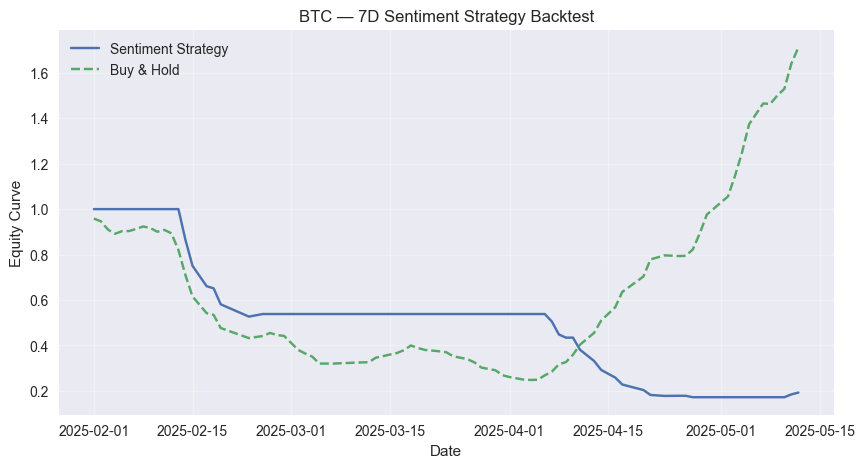

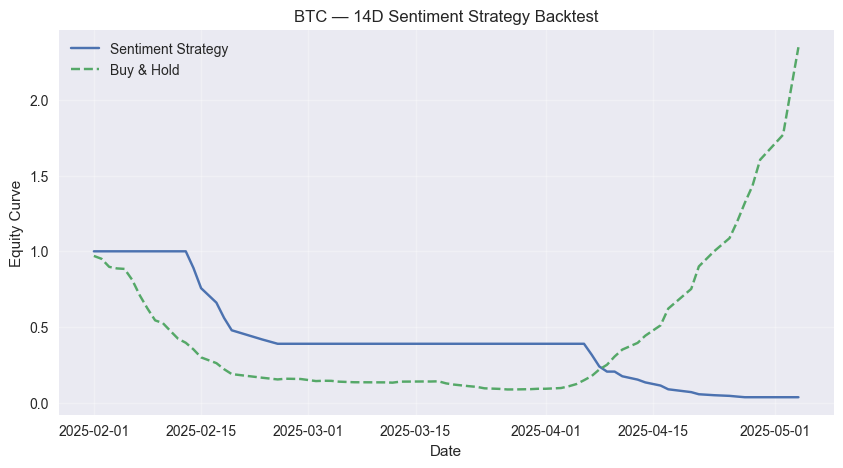

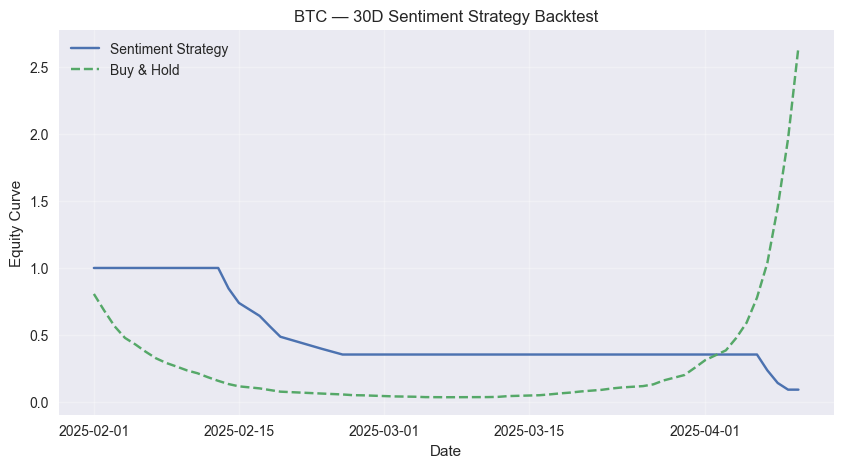

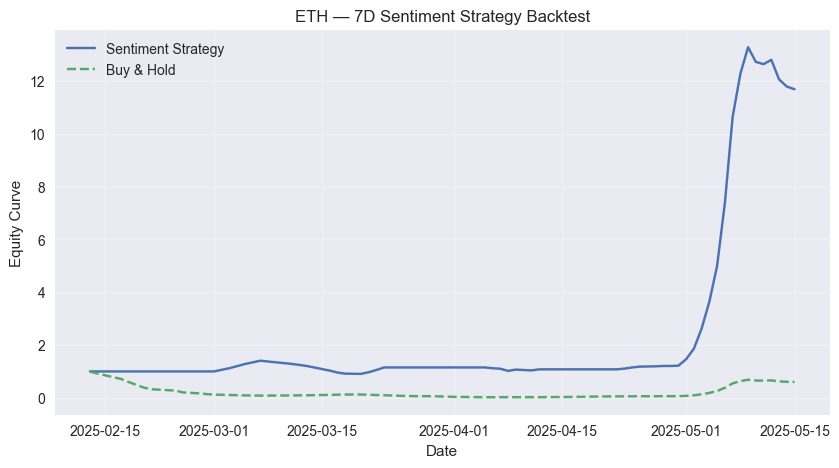

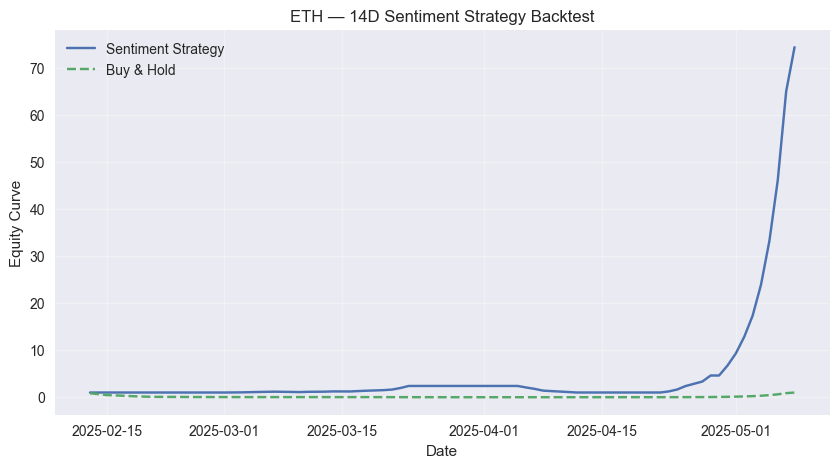

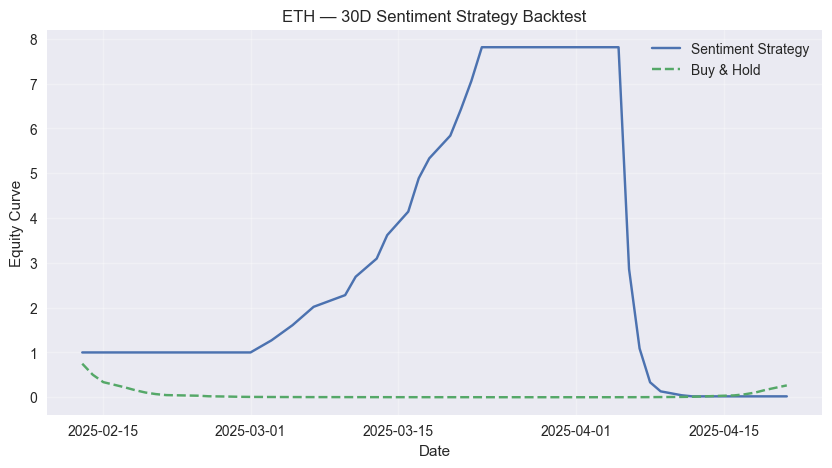

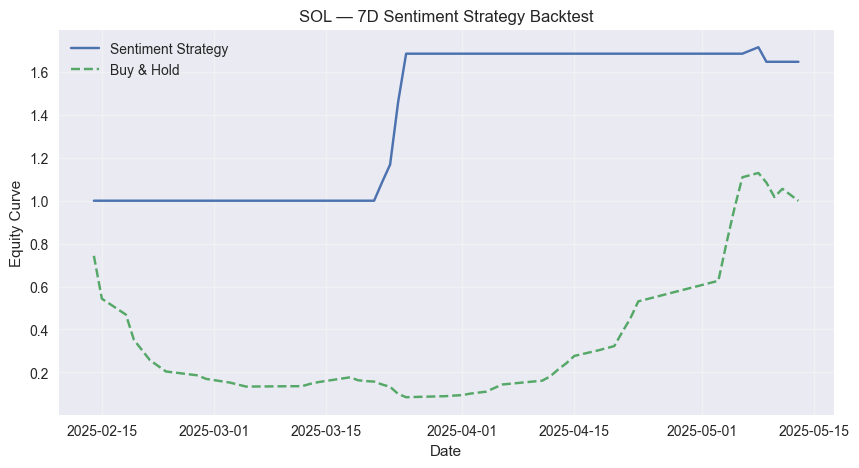

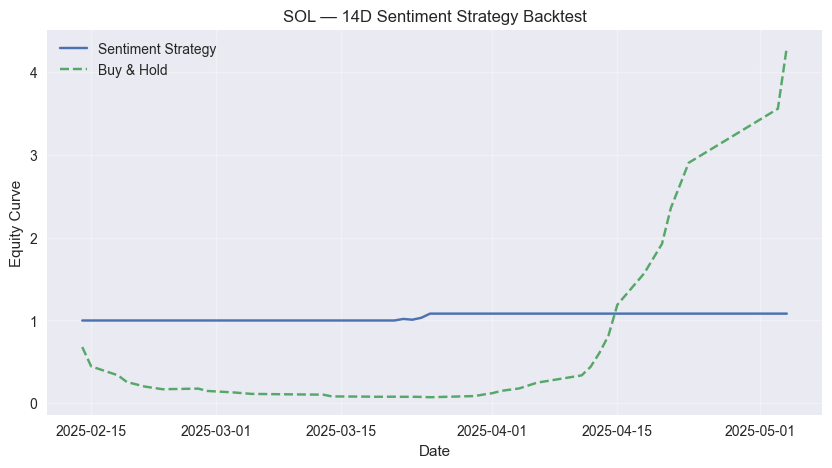

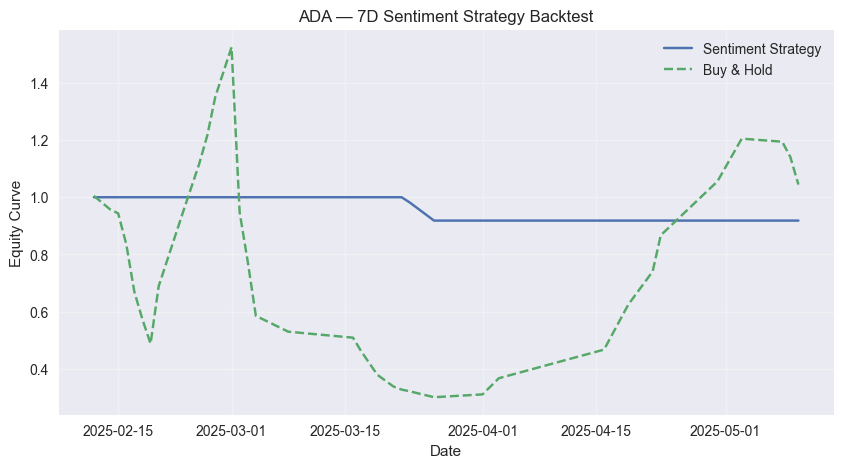

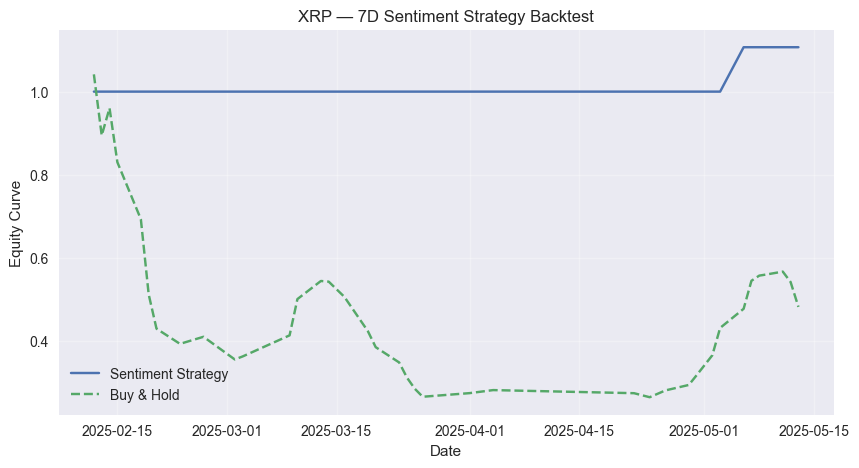

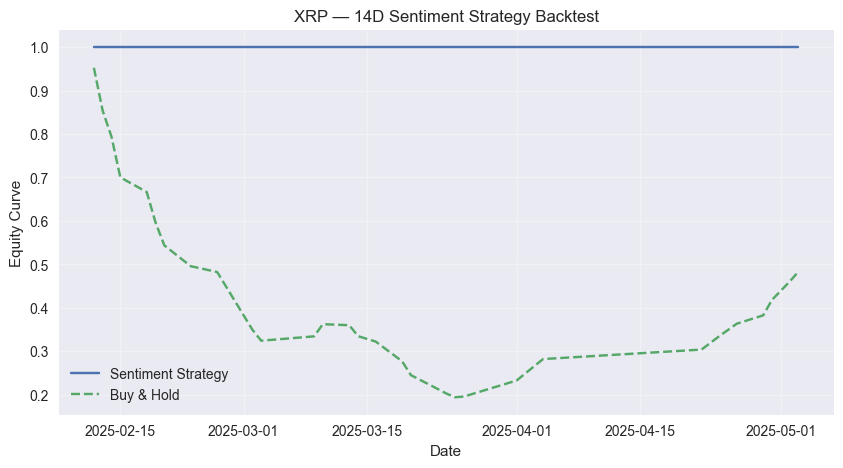

In [47]:
for coin in COINS:
    for h in HORIZONS:

        temp = (
            df[df["coin"] == coin]
            .dropna(subset=[f"strategy_return_{h}d", f"future_return_{h}d"])
            .sort_values("date")
            .copy()
        )

        if len(temp) < 30:
            continue

        temp["equity_strategy"] = (1 + temp[f"strategy_return_{h}d"]).cumprod()
        temp["equity_market"] = (1 + temp[f"future_return_{h}d"]).cumprod()

        plt.figure(figsize=(10, 5))
        plt.plot(temp["date"], temp["equity_strategy"], label="Sentiment Strategy")
        plt.plot(temp["date"], temp["equity_market"], linestyle="--", label="Buy & Hold")

        plt.title(f"{coin} — {h}D Sentiment Strategy Backtest")
        plt.ylabel("Equity Curve")
        plt.xlabel("Date")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

In [48]:
import os
os.makedirs("../data/dashboard", exist_ok=True)

analysis_df.to_csv("../data/dashboard/sentiment_price_merged.csv", index=False)

print("✅ sentiment_price_merged.csv exported successfully!")


✅ sentiment_price_merged.csv exported successfully!
